# **INX Employee Performance**

## **Company Background:**
INX Future Inc., a global player in analytics and automation for over 15 years, has recently been facing a noticeable dip in employee performance. This decline is starting to impact client satisfaction and delivery quality, prompting leadership to dig deeper into what’s driving these changes. Complaints have increased, and satisfaction ratings dropped by around 8%.

With performance closely tied to business outcomes, INX decided it was time to get actionable insights from its own employee data. The aim was not only to understand the root causes of performance dips but also to forecast performance potential for future hiring without negatively impacting team morale during any course corrections.

#### **Key Goals**

* Compare how departments are performing across the board

* Identify the top 3 factors that influence employee performance

* Build a predictive model to assist in hiring decisions

* Recommend practical steps to help improve employee output and engagement

#### **Why This Analysis Matters:**
* Employee attrition leads to hiring and training costs.

* Losing good talent or misjudging bad performers can hurt business.

* Data-driven decisions will help management take fair, strategic actions while preserving company culture.

## **Data Requirements**

The employee performance date of INX Future Inc. can be downloads from below link.
http://data.iabac.org/exam/p2/data/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls


This Excel file includes a mix of numerical and categorical features related to employees’ demographics, job roles, satisfaction levels, and performance ratings.

## **Deep Dive into the Data**

#### Dataset Overview
* 19 numerical columns

* 9 categorical columns

* Target variable: PerformanceRating (Ordinal: e.g.: 2–4)


We’re working with supervised data, so we know the outcome labels and can train models to predict them.

#### **Exploration Highlights**

##### **Univariate Observations:**
* Most employees are aged between 25 to 45 years, with an average age of around 36.

* A significant portion of the workforce lives in close proximity to the office ,likely improving punctuality and availability.

* The majority of employees rated their job environment and involvement at level 3 , indicating a neutral to moderately positive sentiment.

* A large number of employees had limited prior job experience and received salary hikes in the range of 0-12%, reflecting moderate compensation adjustments.

##### **Bivariate Insights:**
* Development and R&D teams consistently show stronger performance compared to others.

* Roles like Data Scientists and Tech Leads are performing above average.

* Long-standing manager-employee relationships may hinder fresh motivation.

* Those who received higher salary hikes tend to perform better.

* Performance appears to dip when promotion is delayed beyond 2 years.

* A good work-life balance and relationship satisfaction seem to be clear indicators of better performance.

* Interesting gender-based rating trends emerged, possibly due to workforce composition rather than bias.


##### **Multivariate Visualization Insight:**
To gain deeper insight into how Age, Hourly Rate, and Years Since Last Promotion relate to Attrition, I utilized a pairplot:


* This visual revealed distinct clusters and spread patterns between those who stayed vs. those who left.

* For instance, employees with low hourly rates and longer durations since last promotion were more likely to show up under the attrition category.

* Younger employees with less than 2 years since promotion formed the bulk of those who stayed, indicating early career motivation and recent growth as retention factors.

This multivariate view confirmed many of the bivariate patterns and added a visual intuition to attrition-linked variables , strengthening the case for targeted HR interventions.

##### **Data Preparation:**

* No missing values to worry about , a clean dataset.

* Converted all categorical fields using Label Encoding.

* Detected and addressed outliers using IQR and 3 Sigma Rule techniques based on feature distribution.

* StandardScaler was used to normalize all numerical features.

##### **Feature Engineering & Selection:**

* Checked correlation coefficients to identify impactful variables.

* Dropped EmployeeNumber (acts as a unique ID, not useful for modeling).

* Final selected features include:

 * Department

 * Job Role

 * Environment Satisfaction

 * Salary Hike Percent

 * Work-Life Balance

 * Tenure with company, manager, and in role

Top 3 performance influencers identified:

1. Environment Satisfaction

2. Last Salary Hike Percent

3. Work-Life Balance

## **Model Building & Evaluation:**

To build a reliable prediction system for employee performance, I experimented with a variety of classification algorithms,from traditional methods like Logistic Regression to more complex models like Random Forests and Artificial Neural Networks.

Since the original dataset had slight class imbalance, I first applied SMOTE (Synthetic Minority Oversampling Technique) to balance the target variable distribution before model training. The dataset was then split into a 75% training and 25% testing set.

##### **Key Observations:**
 * Logistic Regression performed reasonably well and served as a good baseline model.

 * Decision Tree initially overfit the training data. After hyperparameter tuning, generalization improved, but still underperformed slightly compared to ensemble models.

 * Random Forest (tuned) delivered excellent results , high performance with less overfitting than its untuned version.

 * Gradient Boosting showed competitive scores, nearly matching the Random Forest in both accuracy and F1 metrics.

 * SVC had balanced scores but slightly underperformed on unseen data compared to ensemble models.

 * MLP (ANN) had strong training performance, but slightly lower test scores, suggesting potential overfitting or sensitivity to parameters.

##### **Final Model Selection: Random Forest Classifier:**

 After evaluating all the models, the tuned Random Forest Classifier was selected as the final model due to its strong performance on both training and testing data:

* High generalization capability

* Robust against overfitting

* Good interpretability via feature importance

* Consistently high F1 score

This model not only performs well but also allows us to understand the weight of each feature in decision-making , making it a practical choice for business use cases like performance forecasting and recruitment filtering.

## **Recommendations to improve the employee performance :**
* **Focus on Environment:** Improve workplace atmosphere and employee satisfaction.

* **Shuffle Managers Periodically:** Consider reassigning managers every 2-3 years to avoid stagnation.

* **Reward Progress:** Timely promotions (every 1–2 years) and meaningful salary hikes boost performance.

* **Support WorkLife Balance:** Offer flexibility or wellness initiatives , it directly correlates with ratings.

* **Hiring Insight:** While recruiting for HR roles, consider gender patterns ,female candidates in some roles have shown better performance trends.

* **Tap into Silent Performers:** Some employees with mid-level satisfaction still deliver excellent performance , don’t overlook them.

In [1]:
# Import necessary libraries for data analysis and visualization
import numpy as np  # For numerical operations
import pandas as pd  # For data manipulation and analysis
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating static, interactive, and animated visualizations

## Data Collection

In [2]:
# Load the dataset into a pandas DataFrame
data = pd.read_excel('/content/INX_Future_Inc_Employee_Performance_CDS_Project2_Data_V1.8.xls')
data  # Display the DataFrame

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                   10                  3  ...                            4   
1                   14                  4  ...                            4   
2                    5                  4  ...                            3   
3                   10                  4  ...                            2   
4                   16                  4  ...                            4   
...                ...                ...  ...                          ...   
1195                 3                  1  ...                            2   
1196                10                  2  ...                            1   
1197                28                  1  ...                            3   
1198                 9                  3  ...                            2   
1199                 3                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                             10                      2                   2   
1                             20                      2                   3   
2                             20                      2                   3   
3                             23                      2                   2   
4                             10                      1                   3   
...                          ...                    ...                 ...   
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                               10                             7   
1                                7                             7   
2                               18                            13   
3                               21                             6   
4                                2                             2   
...                            ...                           ...   
1195                             6           

## Basic Check

We look at the structure and summary of the data.

In [3]:
data.head()  # Display the first few rows of the DataFrame

EmpNumber  Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0  E1001000   32   Male           Marketing        Single            Sales   
1  E1001006   47   Male           Marketing        Single            Sales   
2  E1001007   40   Male       Life Sciences       Married            Sales   
3  E1001009   41   Male     Human Resources      Divorced  Human Resources   
4  E1001010   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
0                  3  ...                            4   
1                  4  ...                            4   
2                  4  ...                            3   
3                  4  ...                            2   
4                  4  ...                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

  YearsSinceLastPromotion  YearsWithCurrManager  Attrition  PerformanceRating  
0                       0                     8         No                  3  
1                       1                     7         No                  3  
2                       1                    12         No                  4  
3                      12                     6         No                  3  
4                       2                     2         No                  3  

[5 rows x 28 columns]

In [4]:
data.tail()  # Display the last few rows of the DataFrame

EmpNumber  Age  Gender EducationBackground MaritalStatus EmpDepartment  \
1195   E100992   27  Female             Medical      Divorced         Sales   
1196   E100993   37    Male       Life Sciences        Single   Development   
1197   E100994   50    Male             Medical       Married   Development   
1198   E100995   34  Female             Medical        Single  Data Science   
1199   E100998   24  Female       Life Sciences        Single         Sales   

            EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
1195   Sales Executive       Travel_Frequently                 3   
1196  Senior Developer           Travel_Rarely                10   
1197  Senior Developer           Travel_Rarely                28   
1198    Data Scientist           Travel_Rarely                 9   
1199   Sales Executive           Travel_Rarely                 3   

      EmpEducationLevel  ...  EmpRelationshipSatisfaction  \
1195                  1  ...                            2   
1196                  2  ...                            1   
1197                  1  ...                            3   
1198                  3  ...                            2   
1199                  2  ...                            1   

      TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
1195                           6                      3                   3   
1196                           4                      2                   3   
1197                          20                      3                   3   
1198                           9                      3                   4   
1199                           4                      3                   3   

      ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
1195                             6                             5   
1196                             1                             0   
1197                            20                             8   
1198                             8                             7   
1199                             2                             2   

     YearsSinceLastPromotion  YearsWithCurrManager  Attrition  \
1195                       0                     4         No   
1196                       0                     0         No   
1197                       3                     8         No   
1198                       7                     7         No   
1199                       2                     0        Yes   

      PerformanceRating  
1195                  4  
1196                  3  
1197                  3  
1198                  3  
1199                  2  

[5 rows x 28 columns]

In [5]:
data.info()  # Get information about the DataFrame's columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

In [6]:
data.describe() # Get descriptive statistics of the DataFrame's numerical columns

Age  DistanceFromHome  EmpEducationLevel  \
count  1200.000000       1200.000000         1200.00000   
mean     36.918333          9.165833            2.89250   
std       9.087289          8.176636            1.04412   
min      18.000000          1.000000            1.00000   
25%      30.000000          2.000000            2.00000   
50%      36.000000          7.000000            3.00000   
75%      43.000000         14.000000            4.00000   
max      60.000000         29.000000            5.00000   

       EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  \
count                 1200.000000    1200.000000        1200.000000   
mean                     2.715833      65.981667           2.731667   
std                      1.090599      20.211302           0.707164   
min                      1.000000      30.000000           1.000000   
25%                      2.000000      48.000000           2.000000   
50%                      3.000000      66.000000           3.000000   
75%                      4.000000      83.000000           3.000000   
max                      4.000000     100.000000           4.000000   

       EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
count  1200.000000         1200.000000         1200.000000   
mean      2.067500            2.732500            2.665000   
std       1.107836            1.100888            2.469384   
min       1.000000            1.000000            0.000000   
25%       1.000000            2.000000            1.000000   
50%       2.000000            3.000000            2.000000   
75%       3.000000            4.000000            4.000000   
max       5.000000            4.000000            9.000000   

       EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
count               1200.000000                  1200.000000   
mean                  15.222500                     2.725000   
std                    3.625918                     1.075642   
min                   11.000000                     1.000000   
25%                   12.000000                     2.000000   
50%                   14.000000                     3.000000   
75%                   18.000000                     4.000000   
max                   25.000000                     4.000000   

       TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
count                 1200.000000            1200.000000         1200.000000   
mean                    11.330000               2.785833            2.744167   
std                      7.797228               1.263446            0.699374   
min                      0.000000               0.000000            1.000000   
25%                      6.000000               2.000000            2.000000   
50%                     10.000000               3.000000            3.000000   
75%                     15.000000               3.000000            3.000000   
max                     40.000000               6.000000            4.000000   

       ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
count                   1200.000000                   1200.000000   
mean                       7.077500                      4.291667   
std                        6.236899                      3.613744   
min                        0.000000                      0.000000   
25%                        3.000000                      2.000000   
50%                        5.000000                      3.000000   
75%                       10.000000                      7.000000   
max                       40.000000                     18.000000   

       YearsSinceLastPromotion  YearsWithCurrManager  PerformanceRating  
count              1200.000000           1200.000000        1200.000000  
mean                  2.194167              4.105000           2.948333  
std                   3.221560              3.541576           0.518866  
min                   0.000000              0.000000           2.000

In [7]:
data.describe(include=['O']) # Get descriptive statistics of the DataFrame's categorical columns

EmpNumber Gender EducationBackground MaritalStatus EmpDepartment  \
count       1200   1200                1200          1200          1200   
unique      1200      2                   6             3             6   
top      E100967   Male       Life Sciences       Married         Sales   
freq           1    725                 492           548           373   

             EmpJobRole BusinessTravelFrequency OverTime Attrition  
count              1200                    1200     1200      1200  
unique               19                       3        2         2  
top     Sales Executive           Travel_Rarely       No        No  
freq                270                     846      847      1022

In [8]:
data.shape # Get the dimensions (rows, columns) of the DataFrame


(1200, 28)

In [9]:
# View all data in the DataFrame
pd.set_option('display.max_columns', None)  # Set the option to display all columns
data  # Display the DataFrame

EmpNumber  Age  Gender EducationBackground MaritalStatus  \
0     E1001000   32    Male           Marketing        Single   
1     E1001006   47    Male           Marketing        Single   
2     E1001007   40    Male       Life Sciences       Married   
3     E1001009   41    Male     Human Resources      Divorced   
4     E1001010   60    Male           Marketing        Single   
...        ...  ...     ...                 ...           ...   
1195   E100992   27  Female             Medical      Divorced   
1196   E100993   37    Male       Life Sciences        Single   
1197   E100994   50    Male             Medical       Married   
1198   E100995   34  Female             Medical        Single   
1199   E100998   24  Female       Life Sciences        Single   

        EmpDepartment        EmpJobRole BusinessTravelFrequency  \
0               Sales   Sales Executive           Travel_Rarely   
1               Sales   Sales Executive           Travel_Rarely   
2               Sales   Sales Executive       Travel_Frequently   
3     Human Resources           Manager           Travel_Rarely   
4               Sales   Sales Executive           Travel_Rarely   
...               ...               ...                     ...   
1195            Sales   Sales Executive       Travel_Frequently   
1196      Development  Senior Developer           Travel_Rarely   
1197      Development  Senior Developer           Travel_Rarely   
1198     Data Science    Data Scientist           Travel_Rarely   
1199            Sales   Sales Executive           Travel_Rarely   

      DistanceFromHome  EmpEducationLevel  EmpEnvironmentSatisfaction  \
0                   10                  3                           4   
1                   14                  4                           4   
2                    5                  4                           4   
3                   10                  4                           2   
4                   16                  4                           1   
...                ...                ...                         ...   
1195                 3                  1                           4   
1196                10                  2                           4   
1197                28                  1                           4   
1198                 9                  3                           4   
1199                 3                  2                           1   

      EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  \
0                55                  3            2                   4   
1                42                  3            2                   1   
2                48                  2            3                   1   
3                73                  2            5                   4   
4                84                  3            2                   1   
...             ...                ...          ...                 ...   
1195             71                  4            2                   4   
1196             80                  4            1                   4   
1197             74                  4            1                   3   
1198             46                  2            3                   2   
1199             65                  3            2                   3   

      NumCompaniesWorked OverTime  EmpLastSalaryHikePercent  \
0                      1       No                        12   
1                      2       No                        12   
2                      5      Yes                        21   
3                      3       No                        15   
4                      8       No                        14   
...                  ...      ...                       ...   
1195                   1      Yes                        20   
1196                   3       No                        17   
1197                   1      Yes                        11   
1198       

In [10]:
# Print the number of rows and columns in the DataFrame
print('We Have Totally {} Rows and {} Columns'.format(data.shape[0], data.shape[1]))

We Have Totally 1200 Rows and 28 Columns


##  Domain Analysis – Column-wise

We look at what each column means --

* EmpNumber :-: Unique employee ID (used for identification, not analysis)

* Age :-: Age of the employee

* Gender :-: Male or Female

* EducationBackground :-: The field of education (e.g., Marketing, Life Sciences)

* MaritalStatus :-: Relationship status (Single, Married, Divorced)

* EmpDepartment :-: Department where the employee works

* EmpJobRole :-: Job title of the employee

* BusinessTravelFrequency :-: How often the employee travels for work

* DistanceFromHome :-: Distance from home to office (in kms or miles)

* EmpEducationLevel :-: Level of education (numerical scale)

* EmpEnvironmentSatisfaction :-: Satisfaction with work environment (rating)

* EmpHourlyRate :-: Hourly wage of the employee

* EmpJobInvolvement :-: How involved the employee is in their job

* EmpJobLevel :-: Position level in the organization hierarchy

* EmpJobSatisfaction :-: Job satisfaction rating

* NumCompaniesWorked :-: Number of companies the employee worked at before

* OverTime :-: Whether the employee works overtime (Yes/No)

* EmpLastSalaryHikePercent :-: Last salary hike in percentage

* EmpRelationshipSatisfaction :-: Satisfaction with supervisor/team relationships

* TotalWorkExperienceInYears :-: Total years of professional experience

* TrainingTimesLastYear :-: Number of training sessions attended last year

* EmpWorkLifeBalance :-: Work-life balance rating

* ExperienceYearsAtThisCompany :-: Total years spent in this company

* ExperienceYearsInCurrentRole :-: Years in the current job role

* YearsSinceLastPromotion :-: Years since the last promotion

* YearsWithCurrManager :-: Years spent with the current manager

* Attrition :-:  whether the employee left the company (Yes/No)

* PerformanceRating :-: Employee’s performance rating (2-4 scale)


## Problem Definition

* Type: This is a Multi-class Classification Problem

* Target: PerformanceRating (Ordinal: e.g.: 2 - 4)

* Goal: We want to create a model that can predict an employee's performance rating based on their data.

## Exploratory Data Analysis (EDA)

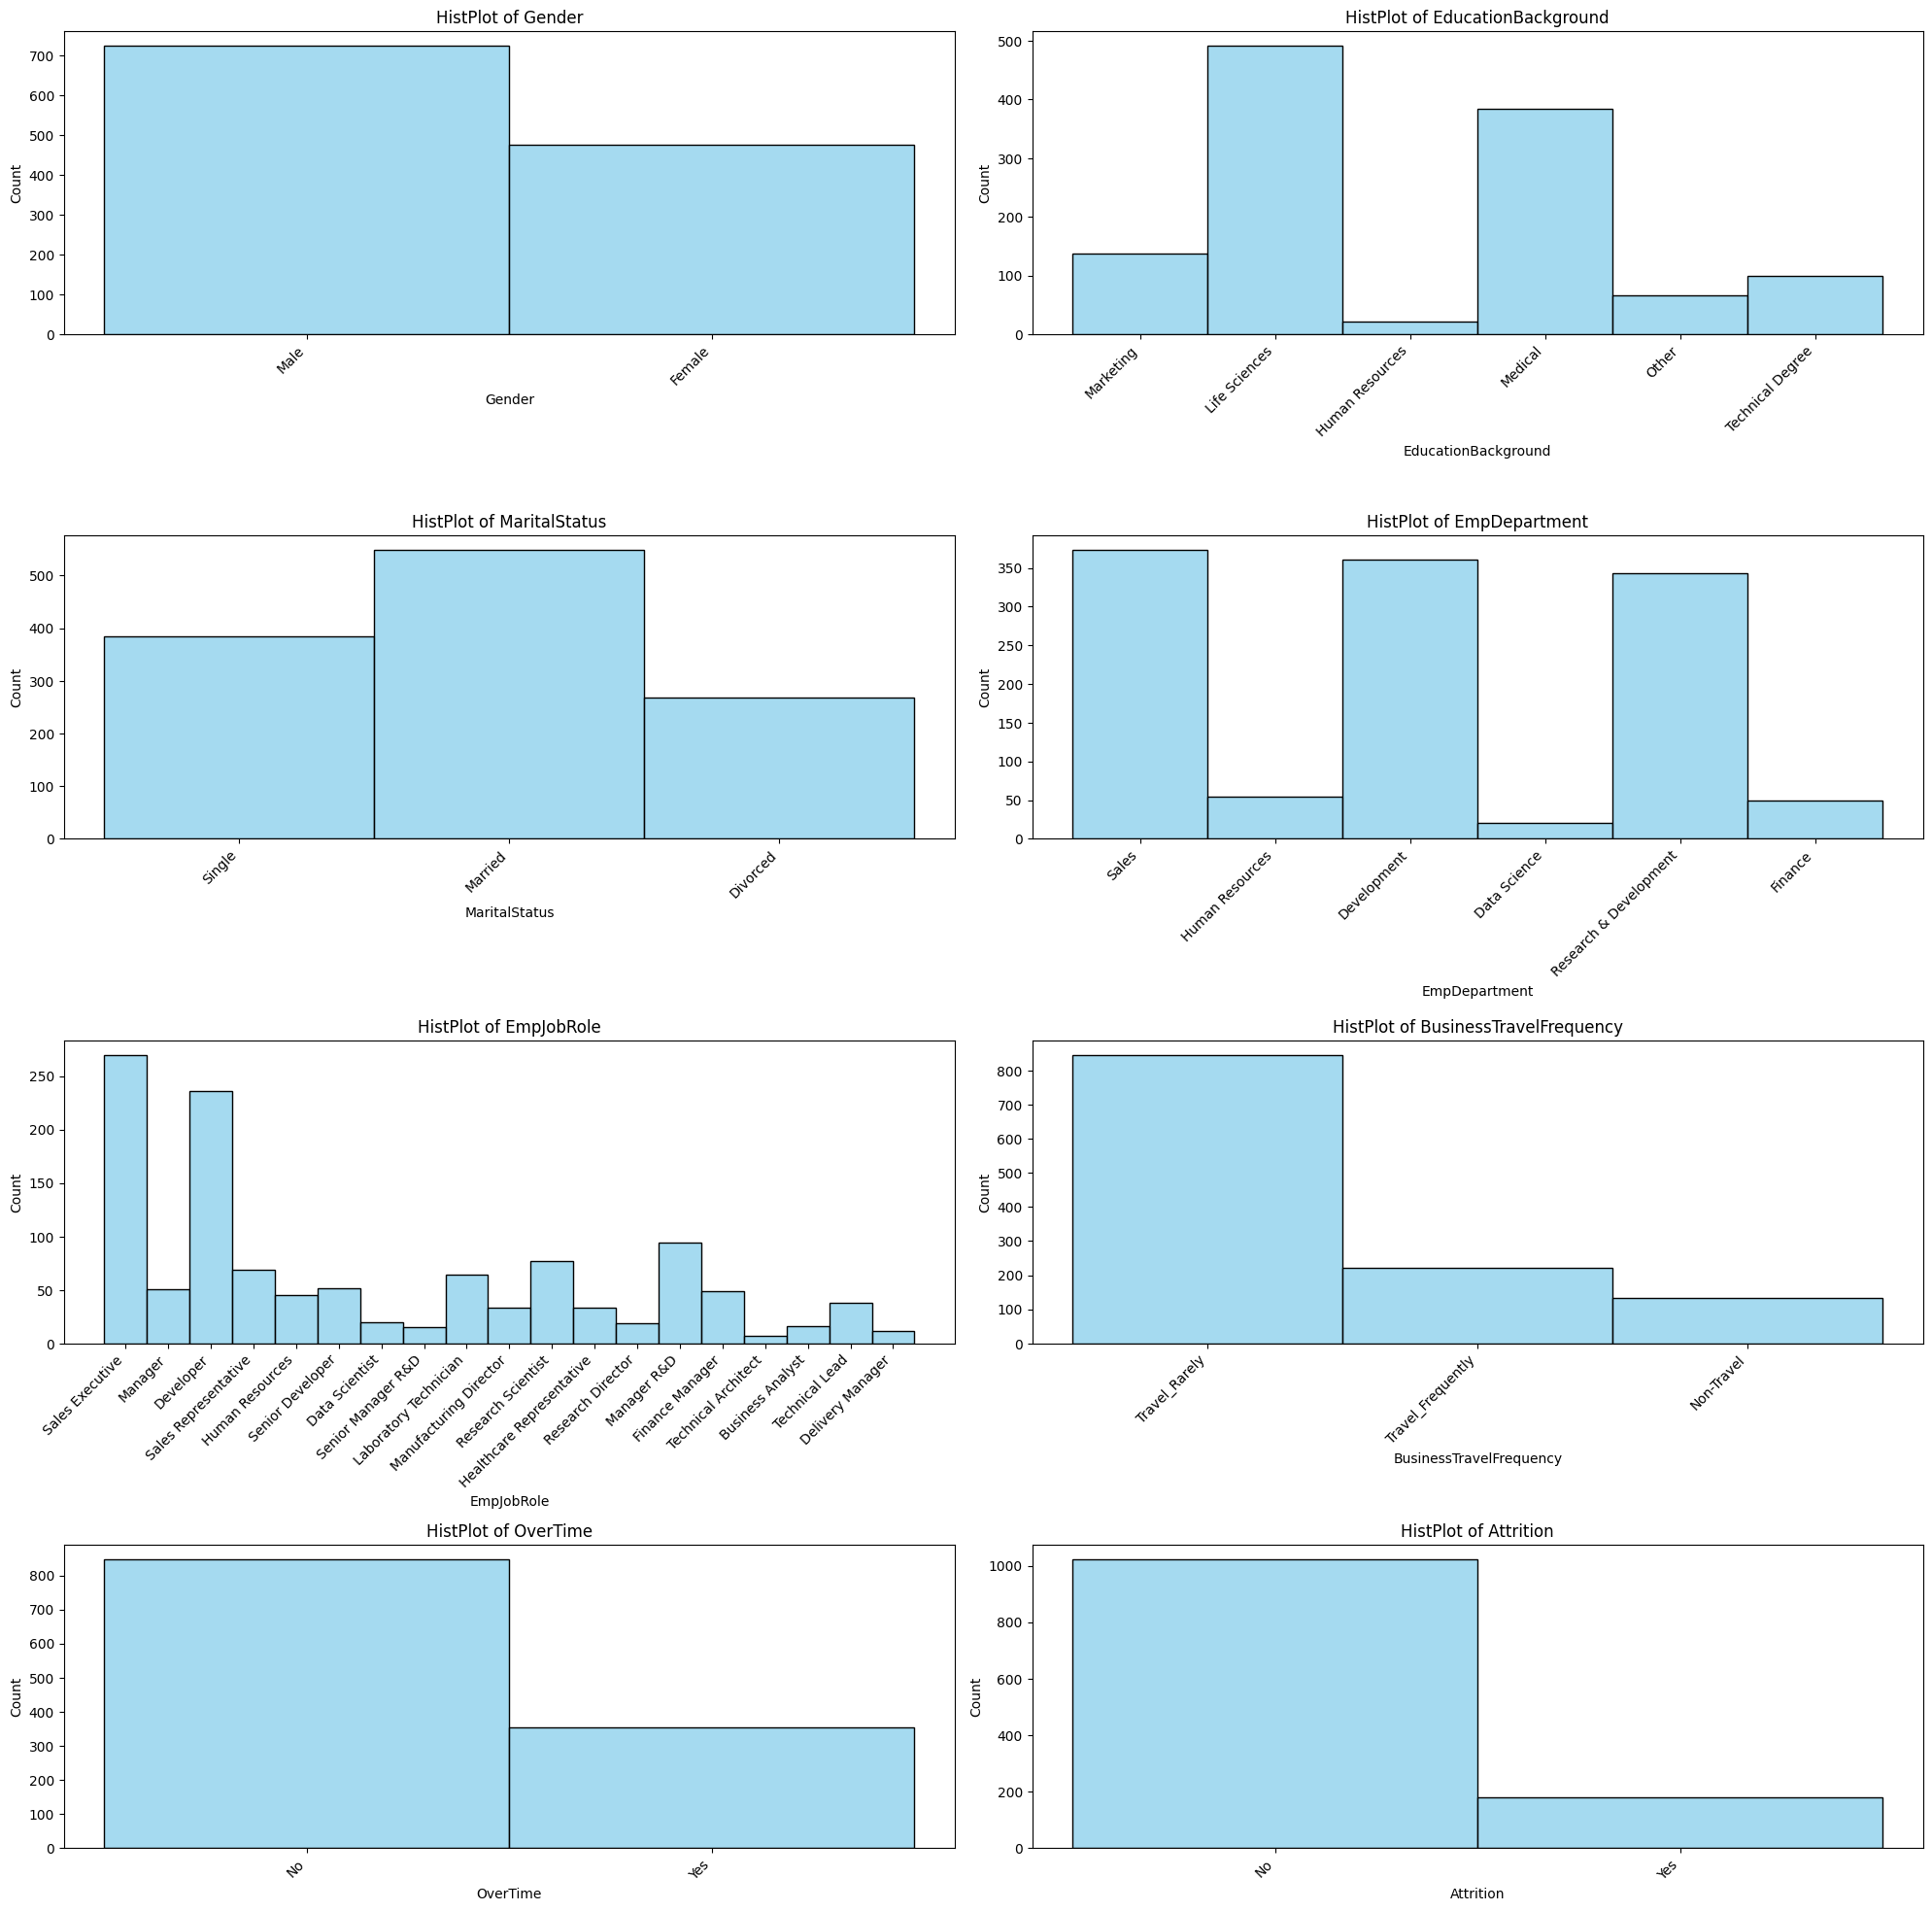

In [11]:
# All distibuted Columns
# Select categorical columns and exclude 'EmpNumber'
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols = categorical_cols[categorical_cols != 'EmpNumber']  # Exclude 'EmpNumber'

# Create histplots for the selected categorical features
plt.figure(figsize=(20, 40))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(len(categorical_cols), 2, i)
    sns.histplot(data=data, x=col, color='skyblue')
    plt.title(f'HistPlot of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

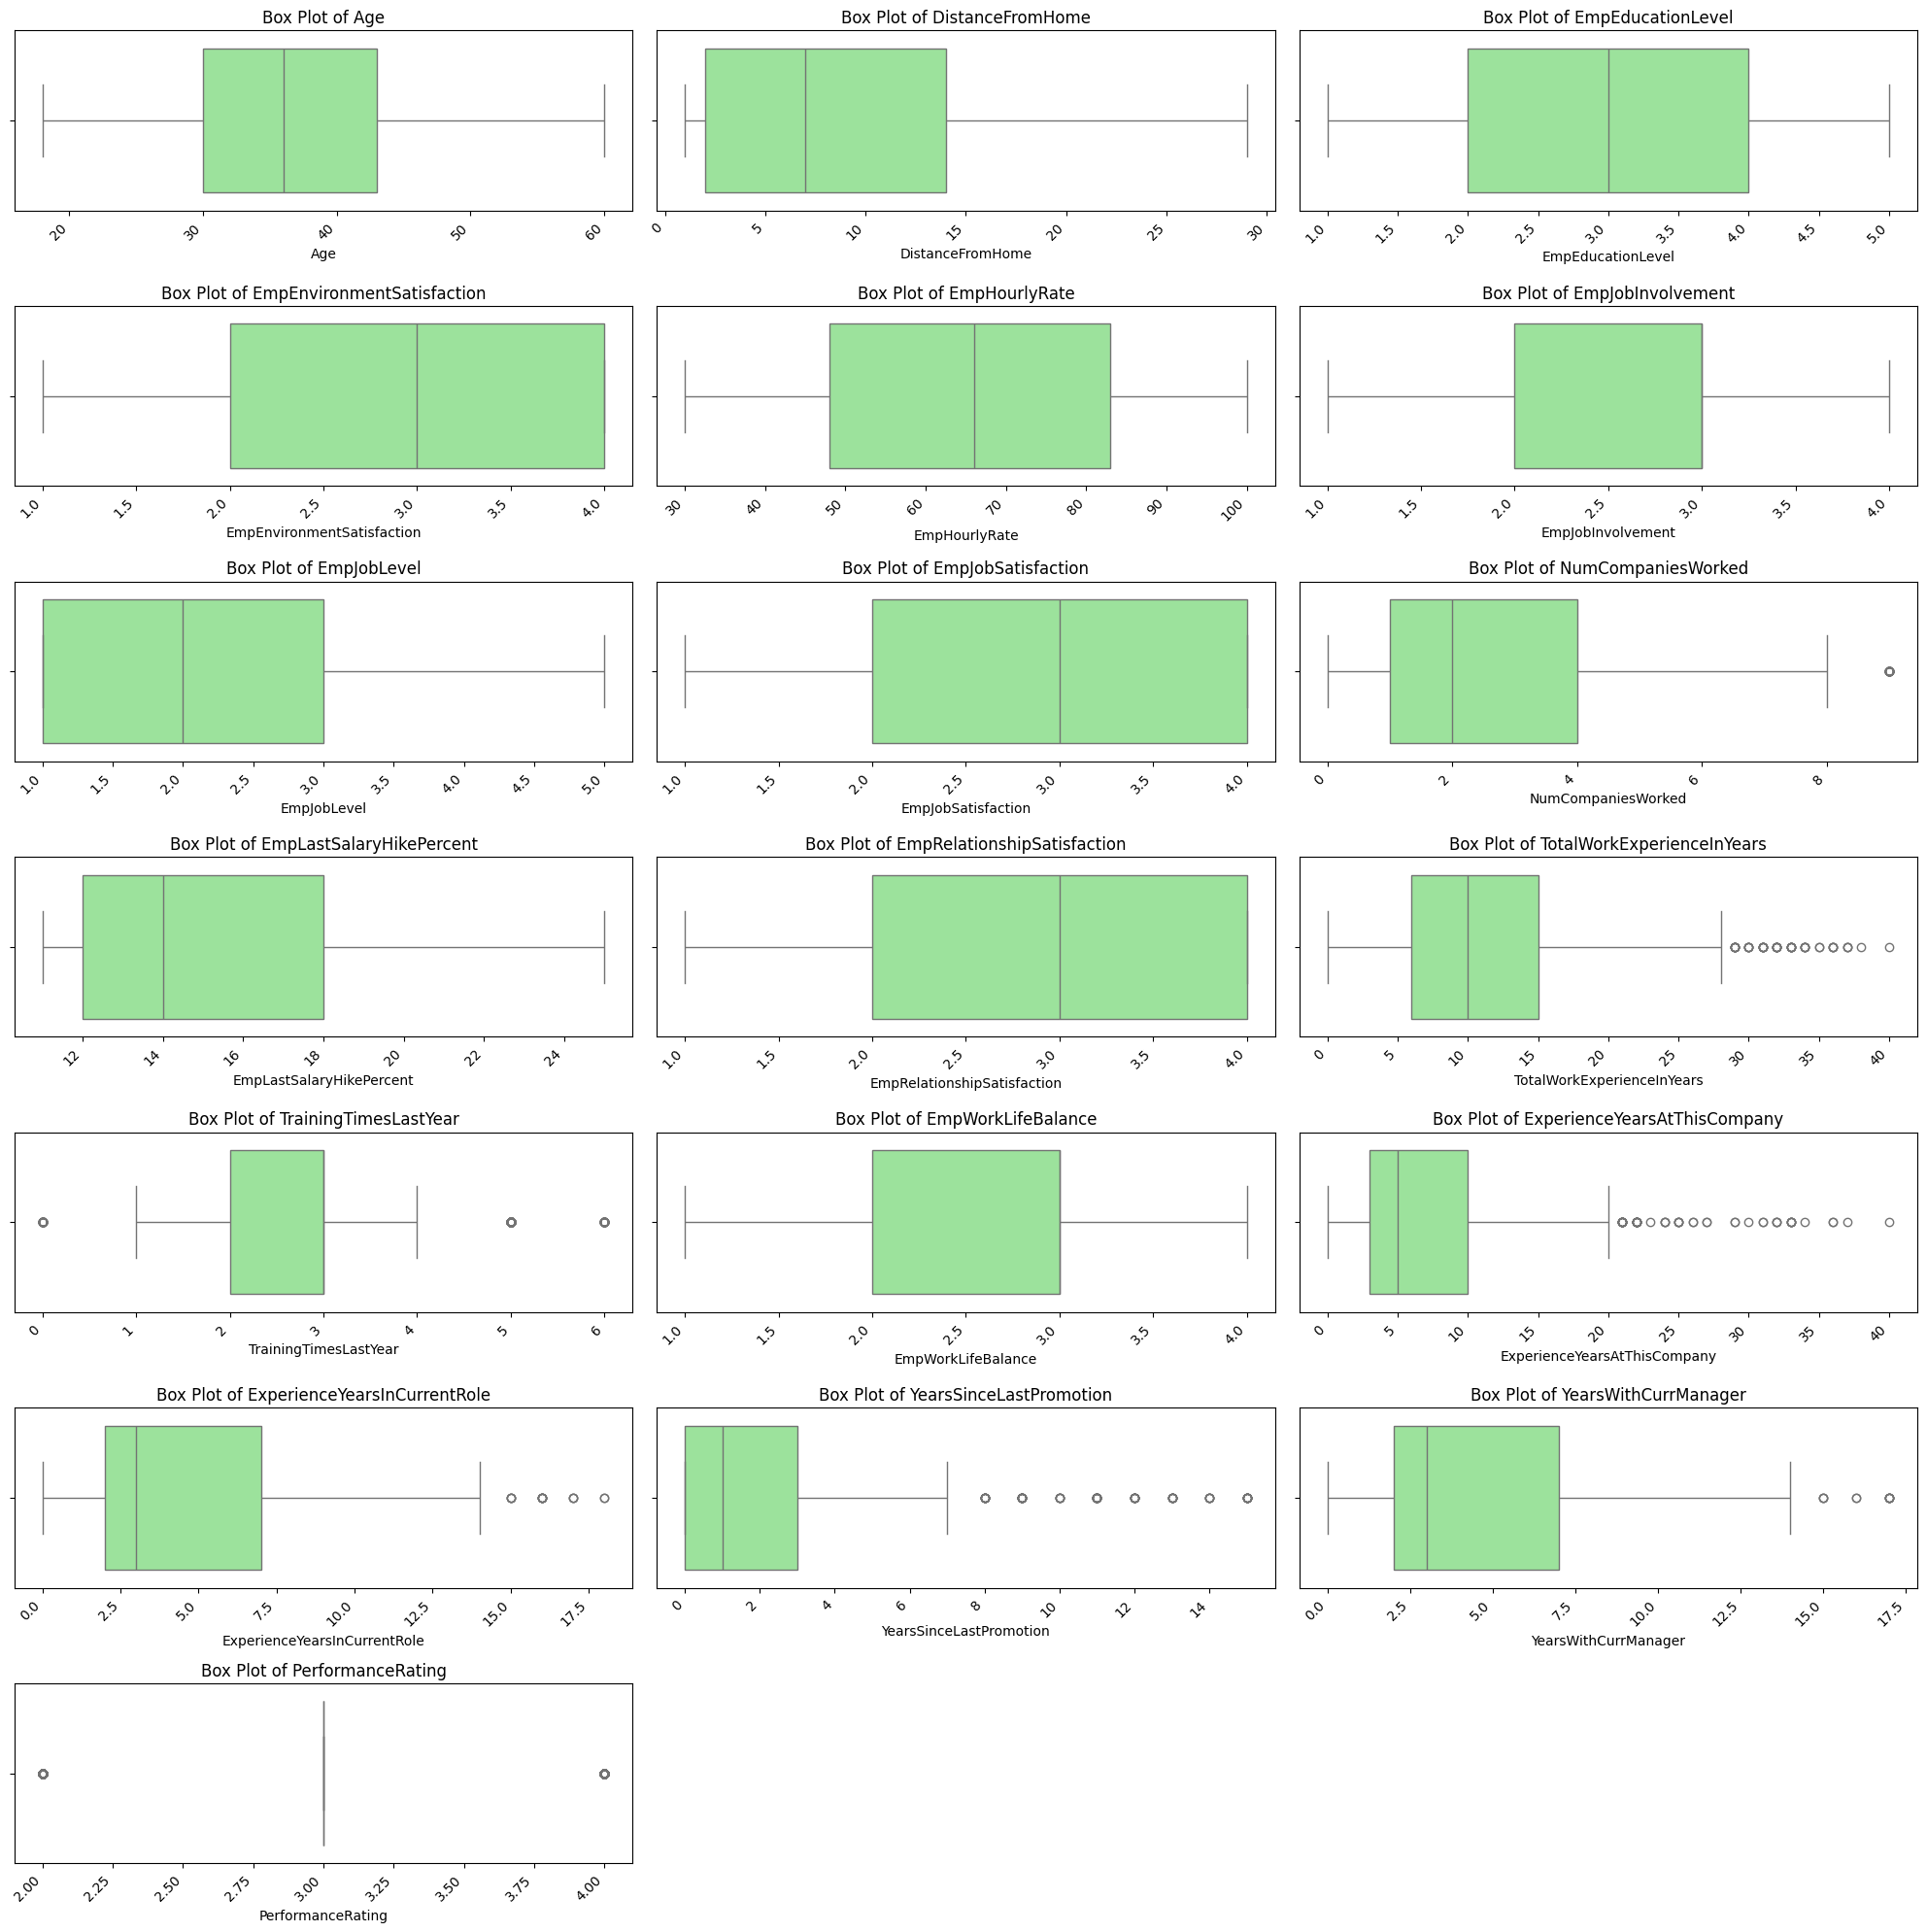

In [12]:
# Checking Outlier
# Visualize potential outliers in each feature using box plots.

# Select numerical columns and exclude 'EmpNumber'
numerical_cols = data.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols[numerical_cols != 'EmpNumber']  # Exclude 'EmpNumber'

# Create box plots for numerical features
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)  # Adjust subplot layout as needed
    sns.boxplot(data=data, x=col, color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Departement wise Performance





In [13]:
# A new pandas Dataframe is created to analyze department wise performance as asked.
dept=data.loc[:,['EmpDepartment','PerformanceRating']]
dept

EmpDepartment  PerformanceRating
0               Sales                  3
1               Sales                  3
2               Sales                  4
3     Human Resources                  3
4               Sales                  3
...               ...                ...
1195            Sales                  4
1196      Development                  3
1197      Development                  3
1198     Data Science                  3
1199            Sales                  2

[1200 rows x 2 columns]

In [14]:
# Finding out the mean performance of all the departments and plotting its bar graph using seaborn.
dept.groupby(by='EmpDepartment').mean()

PerformanceRating
EmpDepartment                            
Data Science                     3.050000
Development                      3.085873
Finance                          2.775510
Human Resources                  2.925926
Research & Development           2.921283
Sales                            2.860590

<ipython-input-15-97ca5bf483f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=dept.EmpDepartment, y=dept.PerformanceRating, palette='plasma')


<Axes: xlabel='EmpDepartment', ylabel='PerformanceRating'>

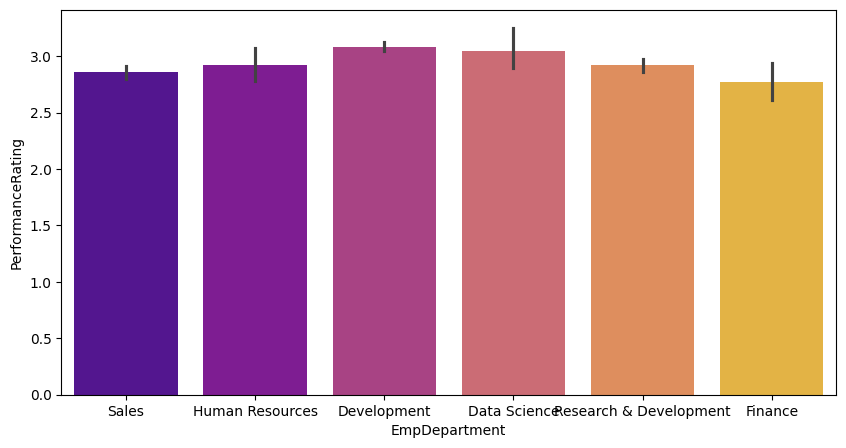

In [15]:
# departement wise performance
plt.figure(figsize=(10,5))
sns.barplot(x=dept.EmpDepartment, y=dept.PerformanceRating, palette='plasma')

In [16]:
#analyse each department seperately
dept.groupby(by='EmpDepartment').value_counts()

EmpDepartment           PerformanceRating
Data Science            3                     17
                        4                      2
                        2                      1
Development             3                    304
                        4                     44
                        2                     13
Finance                 3                     30
                        2                     15
                        4                      4
Human Resources         3                     38
                        2                     10
                        4                      6
Research & Development  3                    234
                        2                     68
                        4                     41
Sales                   3                    251
                        2                     87
                        4                     35
Name: count, dtype: int64

In [17]:
# Creating the dept_rating DataFrame using groupby and value_counts
dept_rating = dept.groupby(by='EmpDepartment')['PerformanceRating'].value_counts().reset_index(name='counts')

<ipython-input-18-6d6aaaf67cf4>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Sales'], palette='plasma')  # Filter data for Sales department
<ipython-input-18-6d6aaaf67cf4>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Development'], palette='plasma')  # Filter data for Development department
<ipython-input-18-6d6aaaf67cf4>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=

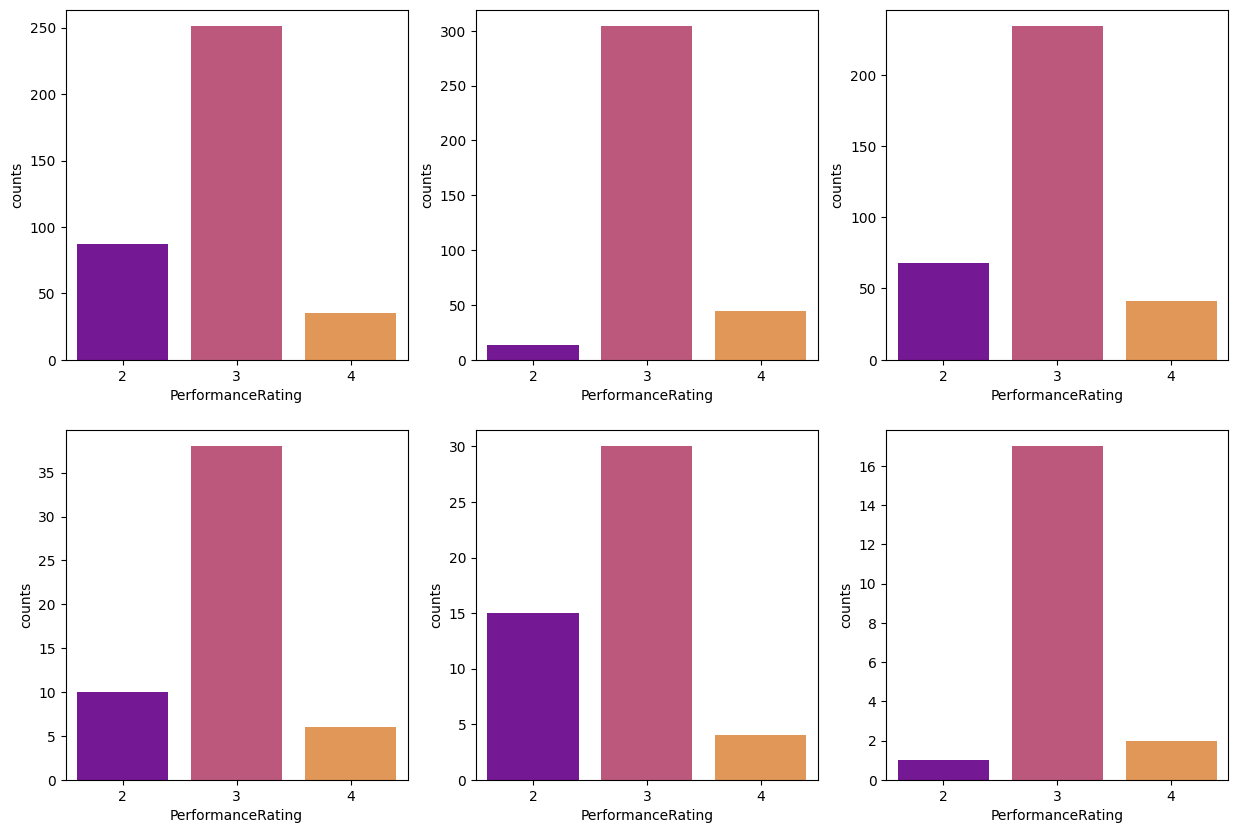

In [18]:
# Plotting a separate bar graph for performance of each department using seaborn
plt.figure(figsize=(15,10))
plt.subplot(2,3,1)
sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Sales'], palette='plasma')  # Filter data for Sales department
plt.subplot(2,3,2)
sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Development'], palette='plasma')  # Filter data for Development department
plt.subplot(2,3,3)
sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Research & Development'], palette='plasma')  # Filter data for R&D department
plt.subplot(2,3,4)
sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Human Resources'], palette='plasma')  # Filter data for HR department
plt.subplot(2,3,5)
sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Finance'], palette='plasma')  # Filter data for Finance department
plt.subplot(2,3,6)
sns.barplot(x='PerformanceRating', y='counts', data=dept_rating[dept_rating.EmpDepartment == 'Data Science'], palette='plasma')  # Filter data for Data Science department
plt.show()

<ipython-input-19-8feeb0fe777b>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EmpJobRole', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship


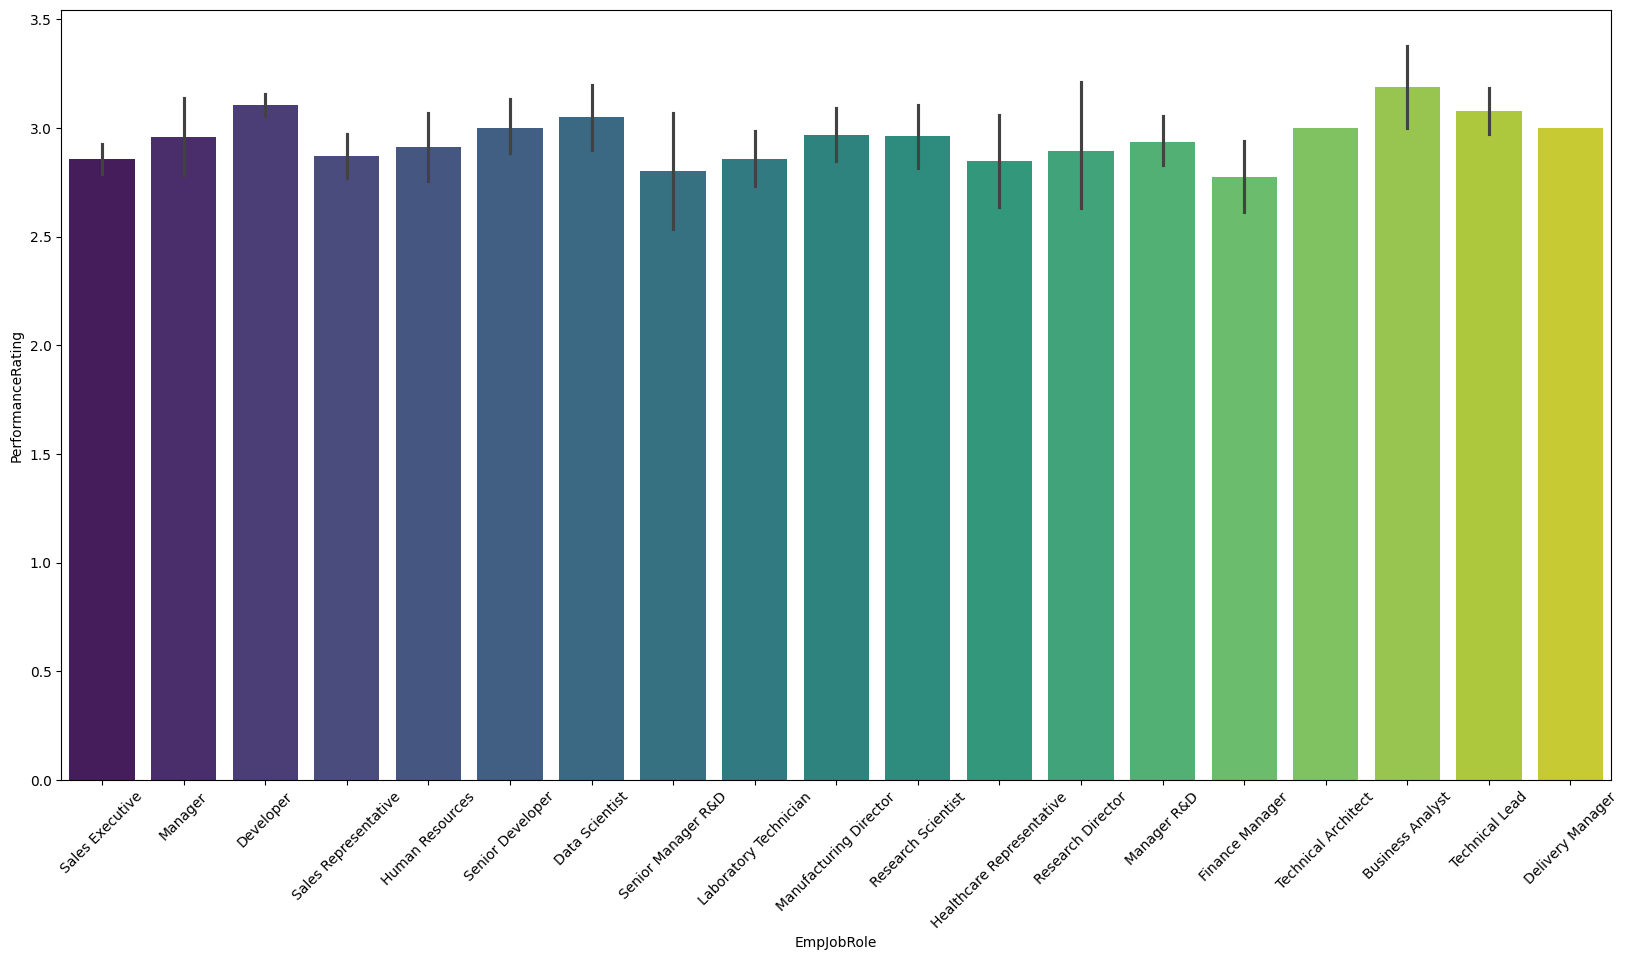

<ipython-input-19-8feeb0fe777b>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='EducationBackground', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship


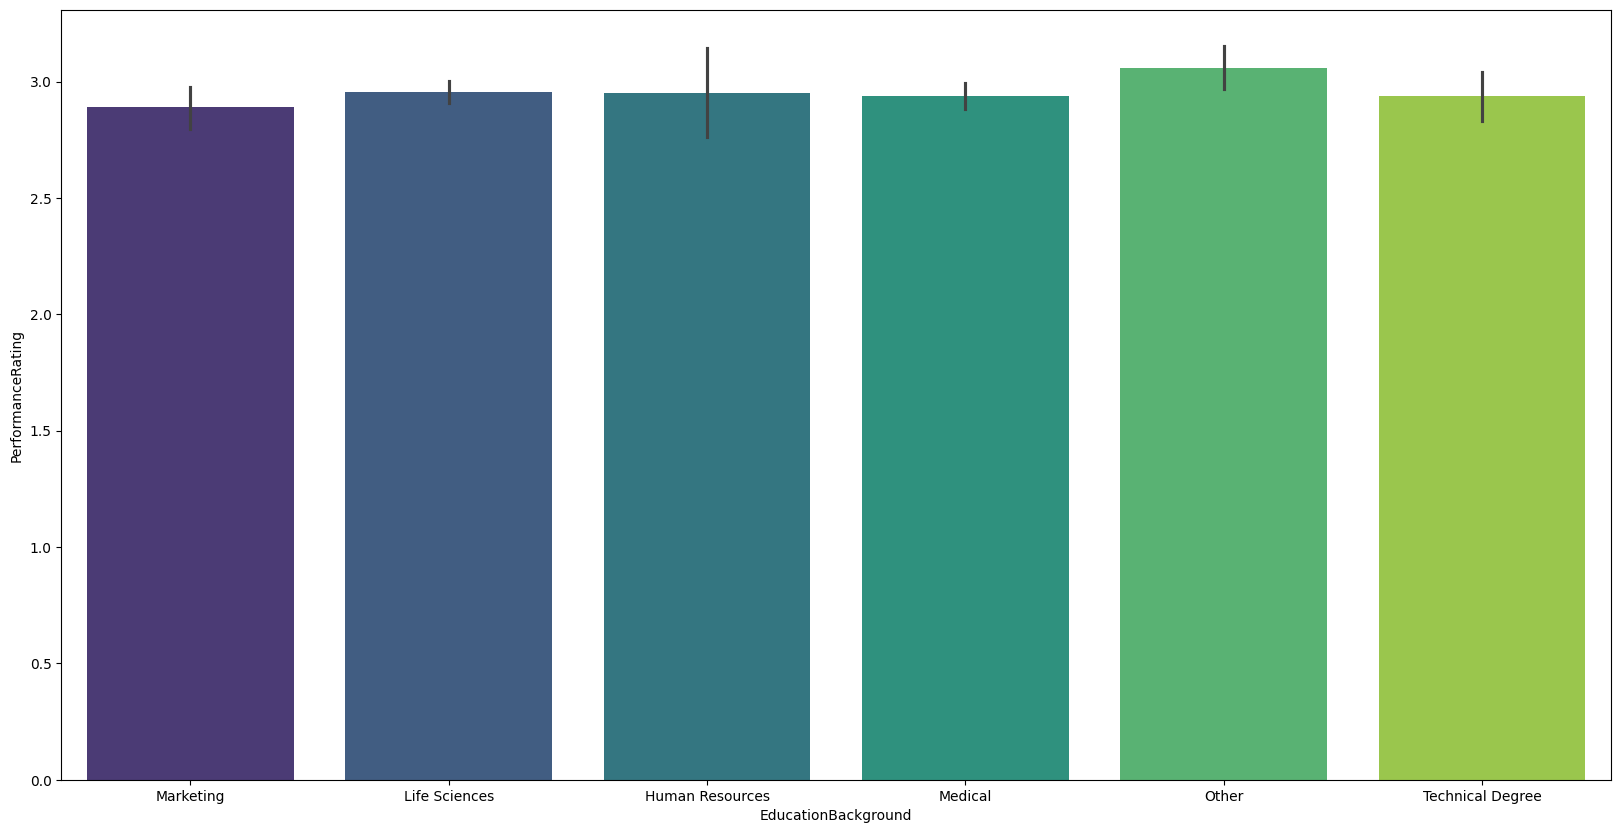

<ipython-input-19-8feeb0fe777b>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='MaritalStatus', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship


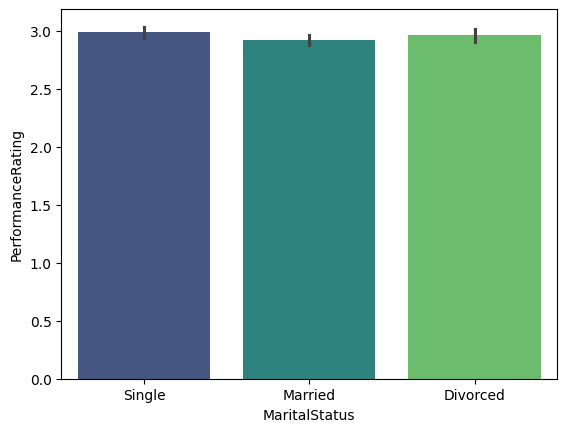

<ipython-input-19-8feeb0fe777b>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='BusinessTravelFrequency', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship


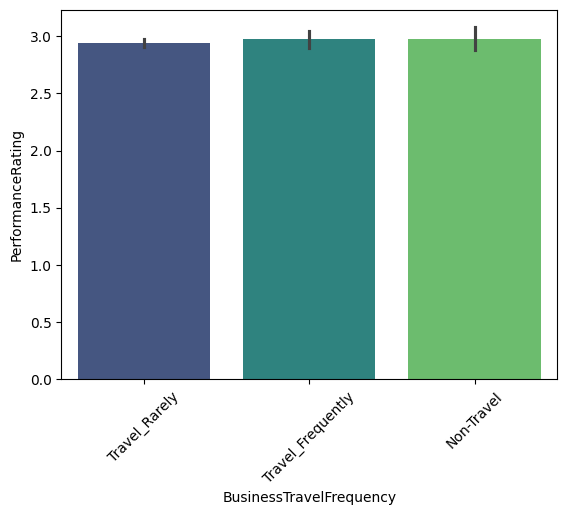

<ipython-input-19-8feeb0fe777b>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='OverTime', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship


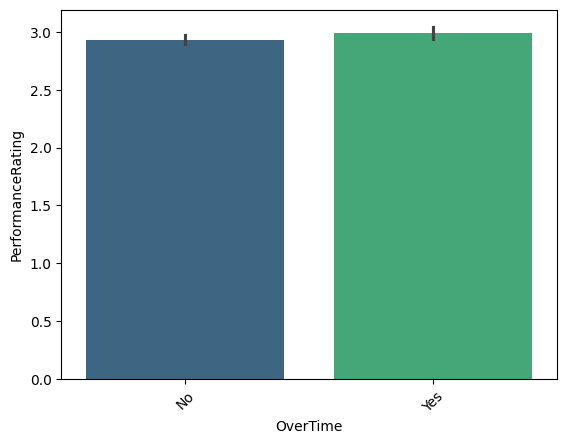

<ipython-input-19-8feeb0fe777b>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Attrition', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship


<Axes: xlabel='Attrition', ylabel='PerformanceRating'>

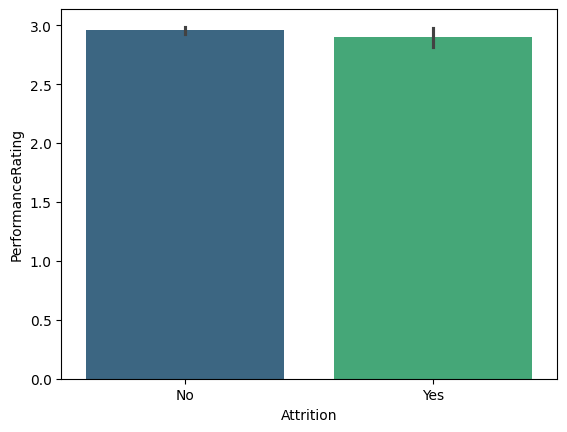

In [19]:
# Analyze the relationship between different categorical features and performance rating

# Performance Rating vs. Employee Job Role
plt.figure(figsize=(20, 10))  # Set the figure size for better visualization
sns.barplot(x='EmpJobRole', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

# Performance Rating vs.Education Background
plt.figure(figsize=(20, 10))  # Set the figure size for better visualization
sns.barplot(x='EducationBackground', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship
plt.show()  # Display the plot


# Performance Rating vs.Marital Status
sns.barplot(x='MaritalStatus', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship
plt.show()  # Display the plot

# Performance Rating vs.Business Travel Frequency
sns.barplot(x='BusinessTravelFrequency', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot


# Performance Rating vs.Overtime Status
sns.barplot(x='OverTime', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()  # Display the plot

# Performance Rating vs.Attrition Status
sns.barplot(x='Attrition', y='PerformanceRating', data=data, palette='viridis')  # Create a bar plot to visualize the relationship
# This plot helps understand if there's a difference in performance rating between employees who left and those who stayed.

Employees in roles like Business Analyst, Technical Lead, Data Scientist, and Developer have generally performed well. Performance doesn't seem to be affected by marital status. Employees who work overtime tend to receive higher performance ratings compared to those who don't.

<Axes: xlabel='Gender', ylabel='EmpHourlyRate'>

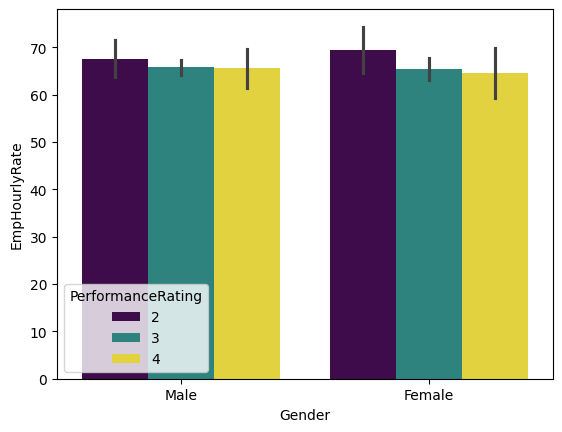

In [20]:
# Create a bar plot to visualize the relationship between Gender, Hourly Rate, and Performance Rating.
sns.barplot(x='Gender', y='EmpHourlyRate', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='Gender', ylabel='count'>

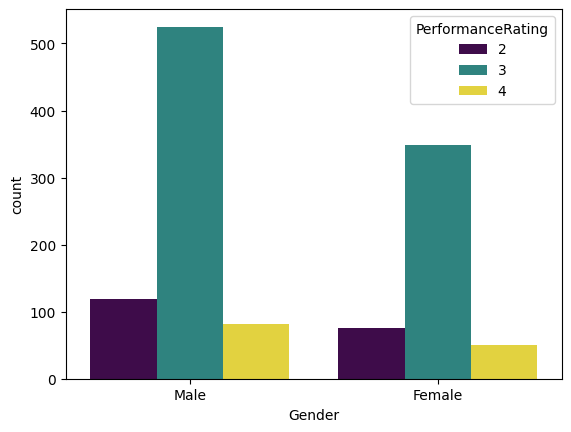

In [21]:
# Create a count plot to visualize the distribution of Performance Ratings across different Genders.
sns.countplot(x='Gender', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='EducationBackground', ylabel='Age'>

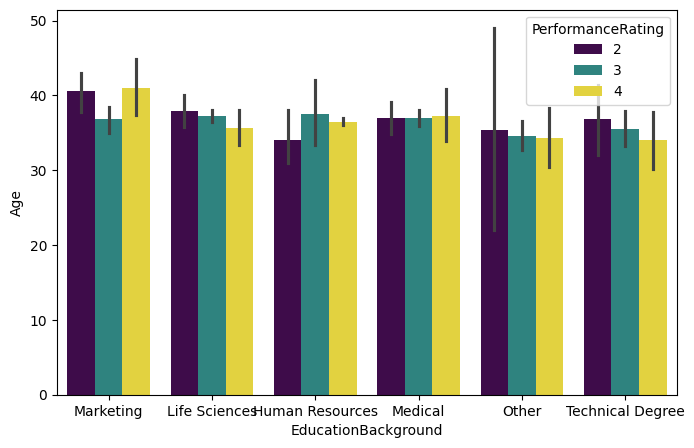

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x='EducationBackground', y='Age', hue='PerformanceRating', data=data, palette='viridis') # Create a bar plot to visualize the relationship between Education Background, Age, and Performance Rating.

<Axes: xlabel='EducationBackground', ylabel='count'>

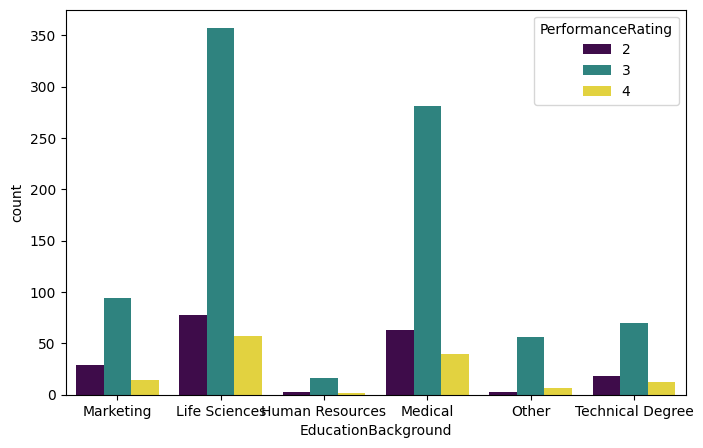

In [23]:
# Create a count plot to visualize the distribution of Performance Ratings across different Education Backgrounds.
plt.figure(figsize=(8,5))
sns.countplot(x='EducationBackground', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='MaritalStatus', ylabel='count'>

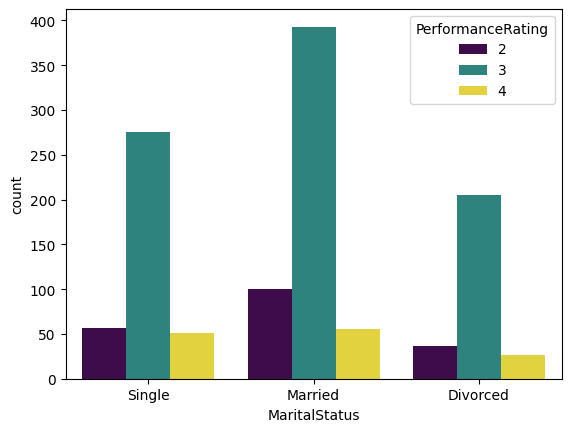

In [24]:
# Create a count plot to visualize the distribution of Performance Ratings across different Marital Statuses.
sns.countplot(x='MaritalStatus', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='EmpDepartment', ylabel='count'>

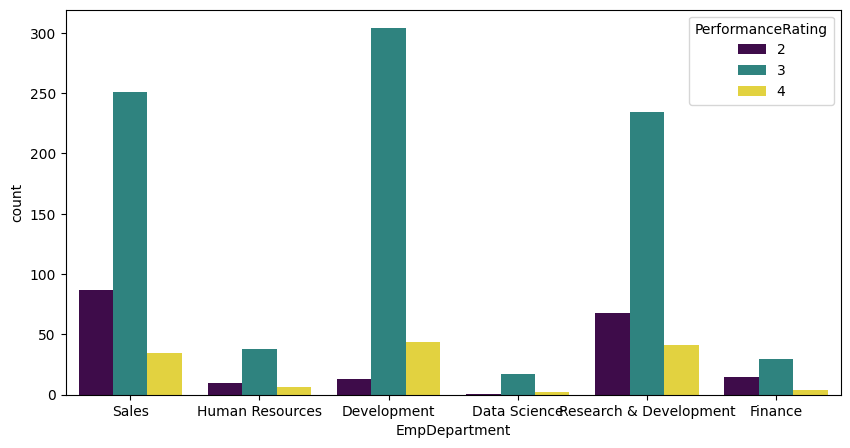

In [25]:
# Create a count plot to visualize the distribution of Performance Ratings across different Employee Departments.

plt.figure(figsize=(10,5))
sns.countplot(x='EmpDepartment', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='BusinessTravelFrequency', ylabel='count'>

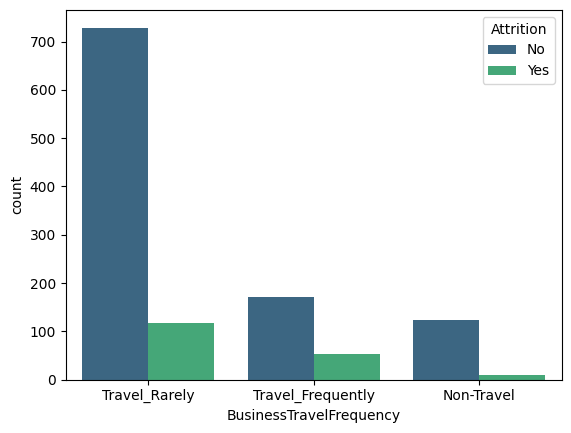

In [26]:
# Create a count plot to visualize the relationship between Business Travel Frequency and Attrition.
sns.countplot(x='BusinessTravelFrequency', hue='Attrition', data=data, palette='viridis')

<Axes: xlabel='BusinessTravelFrequency', ylabel='count'>

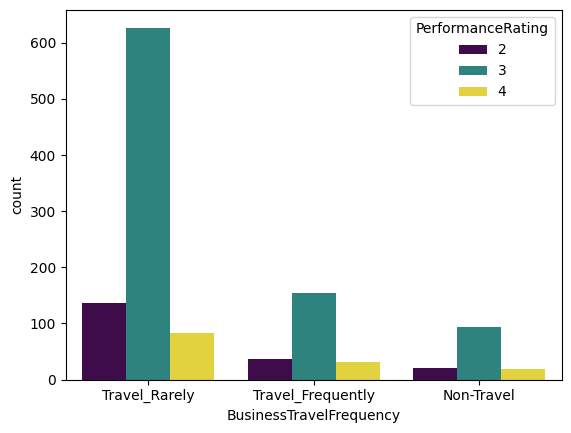

In [27]:
# Create a count plot to visualize the distribution of Performance Ratings across different Business Travel Frequencies.
sns.countplot(x='BusinessTravelFrequency', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='OverTime', ylabel='count'>

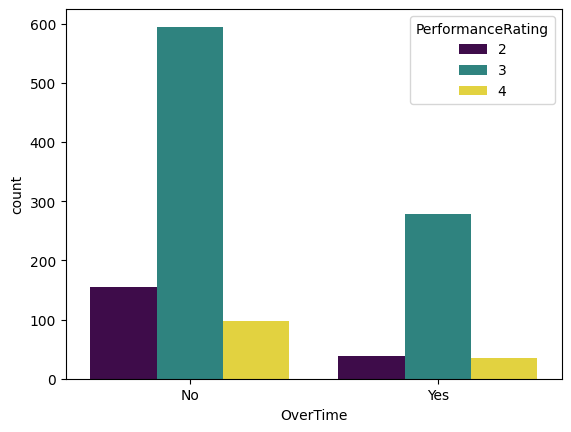

In [28]:
# Create a count plot to visualize the distribution of Performance Ratings for employees who work Overtime and those who don't.
sns.countplot(x='OverTime', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='Gender', ylabel='DistanceFromHome'>

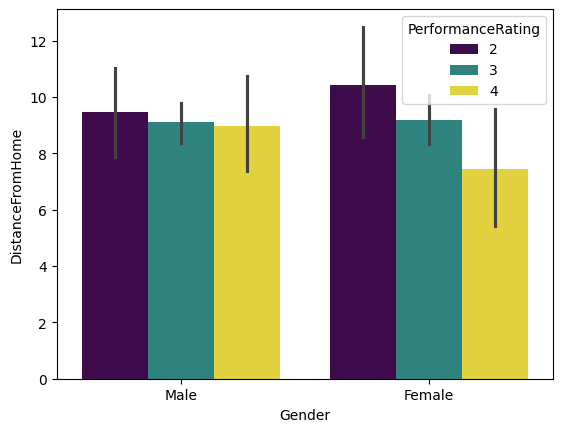

In [29]:
# Create a bar plot to visualize the relationship between Gender, Distance From Home, and Performance Rating.
sns.barplot(x=data.Gender, y=data.DistanceFromHome, hue=data.PerformanceRating, palette='viridis')

<Axes: xlabel='YearsWithCurrManager', ylabel='count'>

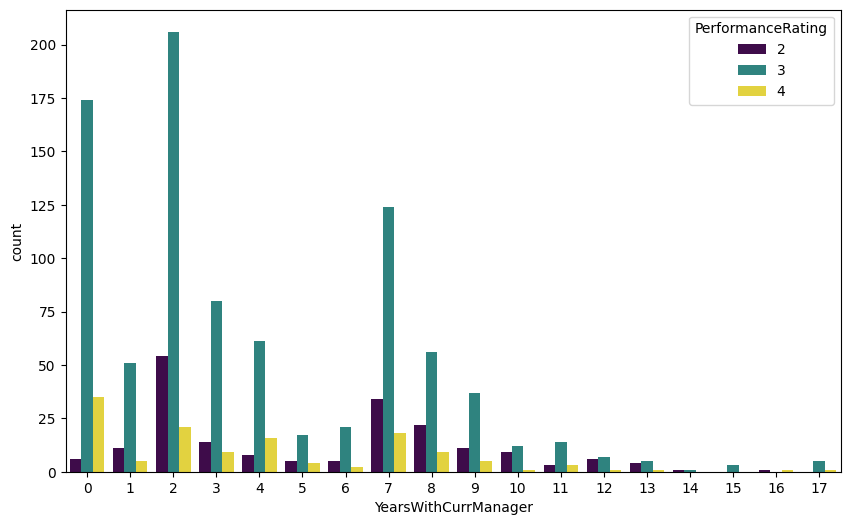

In [30]:
# Create a count plot to visualize the distribution of Performance Ratings across different lengths of time with the current manager.
plt.figure(figsize=(10,6))
sns.countplot(x='YearsWithCurrManager', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='YearsSinceLastPromotion', ylabel='count'>

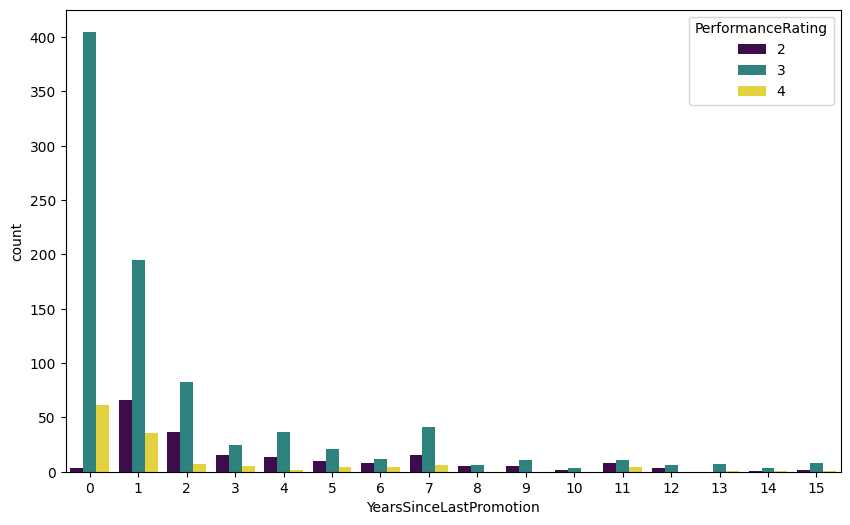

In [31]:
# Create a count plot to visualize the distribution of Performance Ratings across different periods since the last promotion.
plt.figure(figsize=(10,6))
sns.countplot(x='YearsSinceLastPromotion', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='EmpWorkLifeBalance', ylabel='count'>

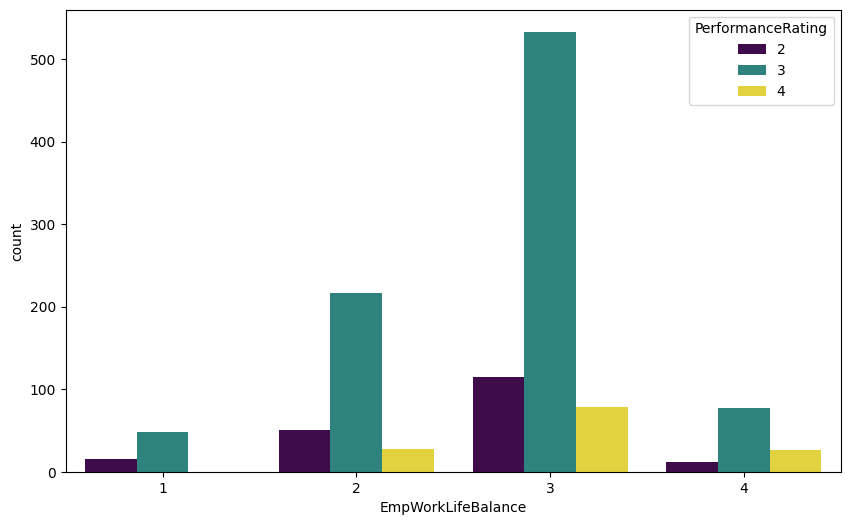

In [32]:
# Create a count plot to visualize the distribution of Performance Ratings across different Work-Life Balance ratings.
plt.figure(figsize=(10,6))
sns.countplot(x='EmpWorkLifeBalance', hue='PerformanceRating', data=data, palette='viridis') # Corrected: 'x' and 'hue' defined, data passed to 'data' param

<Axes: xlabel='EmpRelationshipSatisfaction', ylabel='count'>

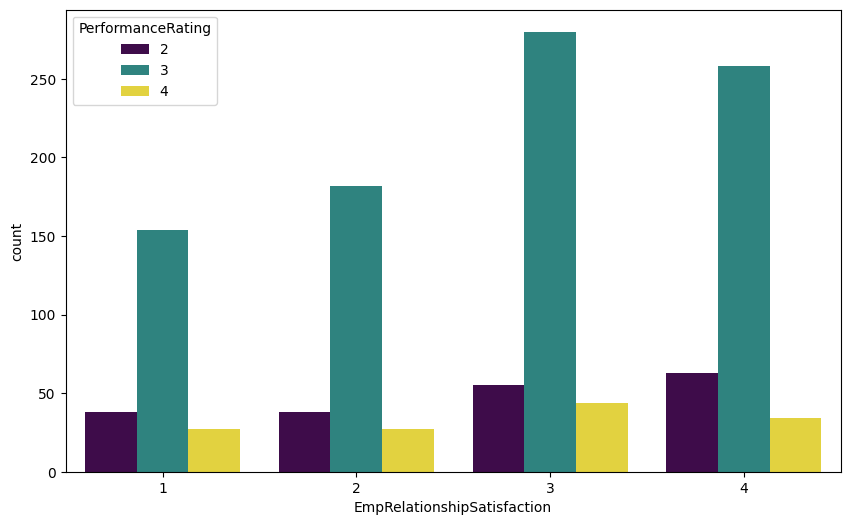

In [33]:
 # Create a count plot to visualize the distribution of Performance Ratings across different Employee Relationship Satisfaction levels.
plt.figure(figsize=(10,6))
sns.countplot(x='EmpRelationshipSatisfaction', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='TotalWorkExperienceInYears', ylabel='count'>

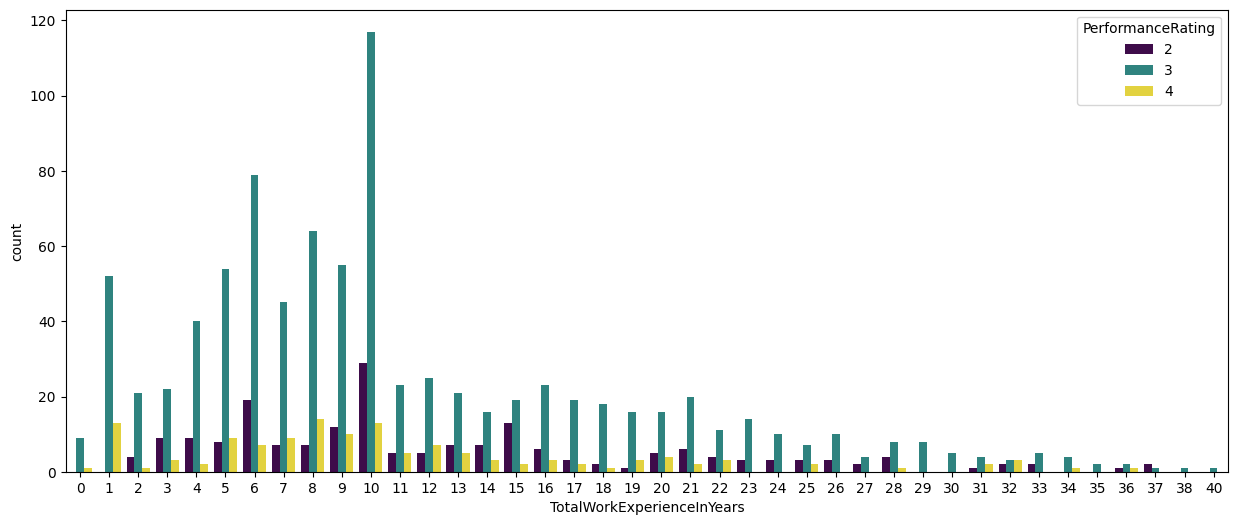

In [34]:
# Create a count plot to visualize the distribution of Performance Ratings across different levels of Total Work Experience In Years.
plt.figure(figsize=(15,6))
sns.countplot(x='TotalWorkExperienceInYears', hue='PerformanceRating', data=data, palette='viridis')

Employee performance seems to decline after they've worked for more than 10 years.

<Axes: xlabel='EmpLastSalaryHikePercent', ylabel='count'>

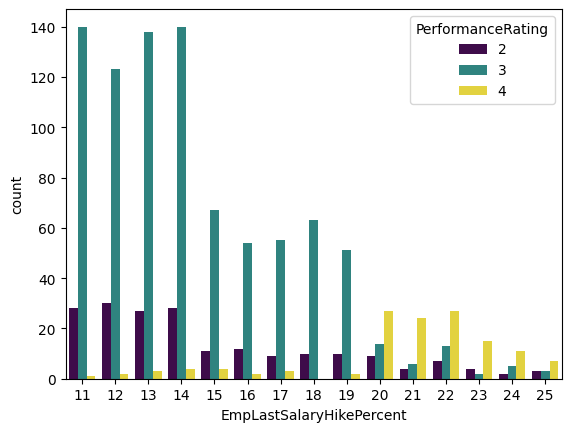

In [35]:
# Create a count plot to visualize the distribution of Performance Ratings across different Employee Last Salary Hike Percentages.
sns.countplot(x=data.EmpLastSalaryHikePercent, hue=data.PerformanceRating, palette='viridis')


It seems that when employees receive a pay raise of more than 19%, their performance tends to improve. This suggests that how well employees perform is linked to how much their salary increases. Employees who get bigger raises generally perform better.

<Axes: xlabel='EmpJobLevel', ylabel='EmpEnvironmentSatisfaction'>

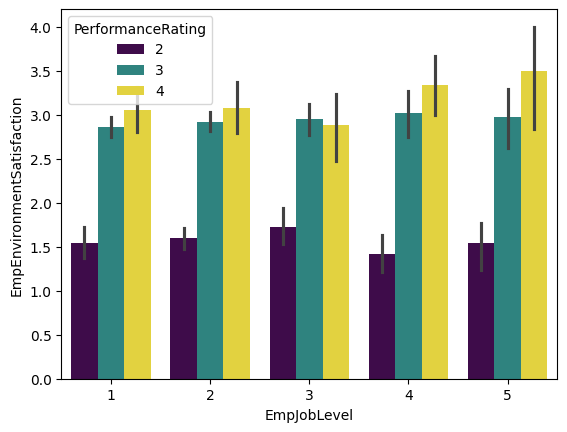

In [36]:
# Create a bar plot to visualize the relationship between Employee Job Level, Environment Satisfaction, and Performance Rating.
sns.barplot(x='EmpJobLevel', y='EmpEnvironmentSatisfaction', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='EmpDepartment', ylabel='DistanceFromHome'>

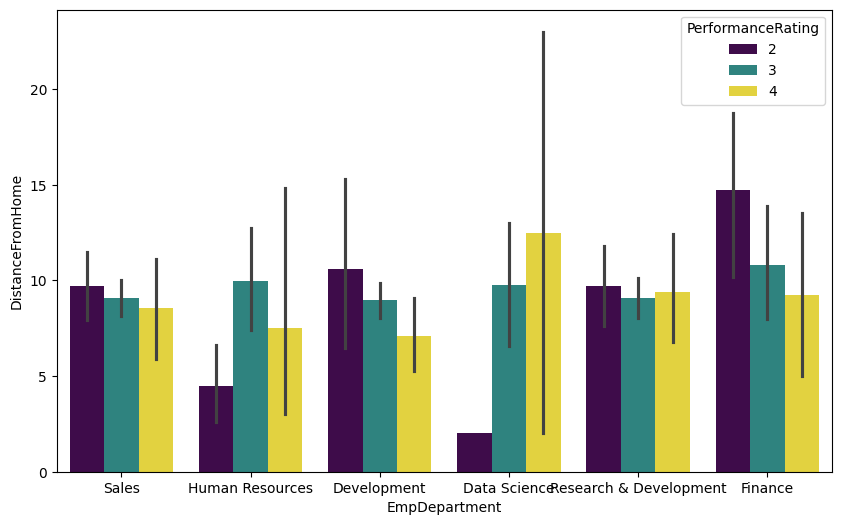

In [37]:
# Create a bar plot to visualize the relationship between Employee Department, Distance From Home, and Performance Rating.
plt.figure(figsize=(10,6))
sns.barplot(x='EmpDepartment', y='DistanceFromHome', hue='PerformanceRating', data=data, palette='viridis')

<Axes: xlabel='EducationBackground', ylabel='EmpEducationLevel'>

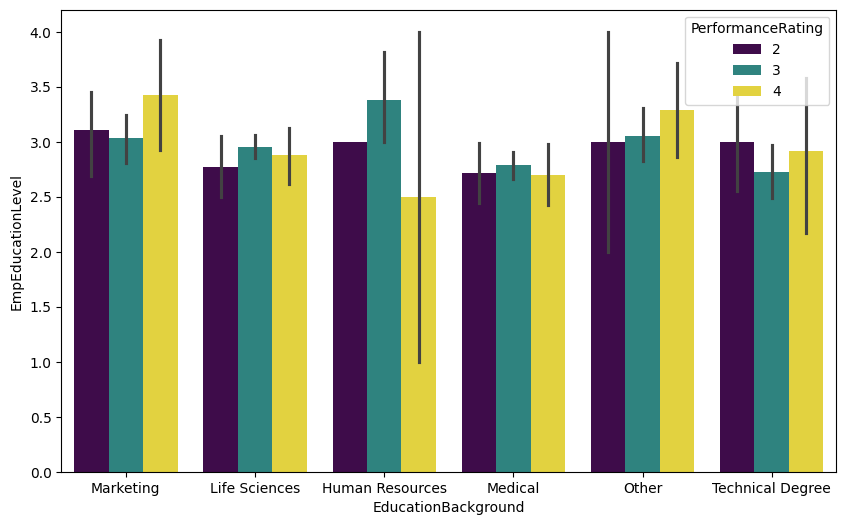

In [38]:
# Create a bar plot to visualize the relationship between Education Background, Employee Education Level, and Performance Rating.
plt.figure(figsize=(10,6))
sns.barplot(x='EducationBackground', y='EmpEducationLevel', hue='PerformanceRating', data=data, palette='viridis') # Corrected: 'x', 'y', and 'data' specified as keyword arguments

<ipython-input-39-d5897d7a7ef6>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Attrition', y='YearsSinceLastPromotion', data=data, palette='viridis')


<Axes: xlabel='Attrition', ylabel='YearsSinceLastPromotion'>

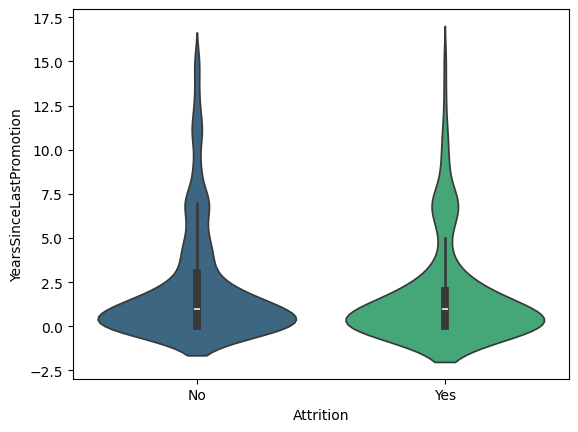

In [39]:
# Create a violin plot to visualize the distribution of 'YearsSinceLastPromotion' for employees who left (Attrition='Yes') and those who stayed (Attrition='No').
sns.violinplot(x='Attrition', y='YearsSinceLastPromotion', data=data, palette='viridis')

In [40]:
# Create a pie chart to visualize the relationship between performance rating, job satisfaction, and job involvement.
import plotly.express as px
fig = px.pie(data, values='EmpJobSatisfaction', names= 'PerformanceRating', color= 'EmpJobInvolvement',
            title = 'Performance rating as per job involvement & job satisfaction',width=600, height=400)
fig.show()

As we can observe from the above diagram, about 11% and 16% of employees who are less satisfied and less involved in their jobs also show lower performance.

In [41]:
#Employee last salary hike percent
 # Create a cross-tabulation to analyze the relationship between Employee Last Salary Hike Percentage and Performance Rating.
pd.crosstab(data['EmpLastSalaryHikePercent'],data['PerformanceRating'],margins=True)

PerformanceRating           2    3    4   All
EmpLastSalaryHikePercent                     
11                         28  140    1   169
12                         30  123    2   155
13                         27  138    3   168
14                         28  140    4   172
15                         11   67    4    82
16                         12   54    2    68
17                          9   55    3    67
18                         10   63    0    73
19                         10   51    2    63
20                          9   14   27    50
21                          4    6   24    34
22                          7   13   27    47
23                          4    2   15    21
24                          2    5   11    18
25                          3    3    7    13
All                       194  874  132  1200

In [42]:
# Employee Work life balance
# Create a cross-tabulation to analyze the relationship between Employee Work-Life Balance and Performance Rating.
pd.crosstab(data['EmpWorkLifeBalance'],data['PerformanceRating'],margins=True)

PerformanceRating     2    3    4   All
EmpWorkLifeBalance                     
1                    16   48    0    64
2                    51  216   27   294
3                   115  533   79   727
4                    12   77   26   115
All                 194  874  132  1200

In [43]:
# Calculate the percentage distribution of Performance Ratings across different Employee Departments, including overall margins.
percent = pd.crosstab(data["PerformanceRating"], data["EmpDepartment"], margins=True,normalize=True)
round(percent.multiply(100),2)

EmpDepartment      Data Science  Development  Finance  Human Resources  \
PerformanceRating                                                        
2                          0.08         1.08     1.25             0.83   
3                          1.42        25.33     2.50             3.17   
4                          0.17         3.67     0.33             0.50   
All                        1.67        30.08     4.08             4.50   

EmpDepartment      Research & Development  Sales     All  
PerformanceRating                                         
2                                    5.67   7.25   16.17  
3                                   19.50  20.92   72.83  
4                                    3.42   2.92   11.00  
All                                 28.58  31.08  100.00

The data clearly shows which employees have low performance, aren't very engaged in their work, and have 2 years or less of experience.

In [44]:
# Filtering those employees whose performance rating is low (2), have not left the company (Attrition='No'),
# have low job involvement (<= 2), and have been with the company for 2 years or less.
low_per=data.loc[(data['PerformanceRating']==2) & (data['Attrition']=='No')& (data['EmpJobInvolvement']<= 2)&
                 (data['ExperienceYearsAtThisCompany'] <= 2),['EmpNumber','ExperienceYearsAtThisCompany',
                                                              'EmpJobInvolvement','Attrition','PerformanceRating']]
low_per

EmpNumber  ExperienceYearsAtThisCompany  EmpJobInvolvement Attrition  \
165   E1001300                             2                  2        No   
182   E1001322                             2                  2        No   
605   E1002079                             2                  2        No   
728   E1002291                             2                  2        No   
878    E100461                             2                  2        No   
1023   E100702                             2                  2        No   

      PerformanceRating  
165                   2  
182                   2  
605                   2  
728                   2  
878                   2  
1023                  2

Based on our second goal, these 6 underperforming employees could be penalized or given a final warning about their performance.

From the visualizations above, it's clear that salary, work environment, job satisfaction, and employee experience have a significant impact on performance ratings. Management should focus on these areas to improve employee performance.

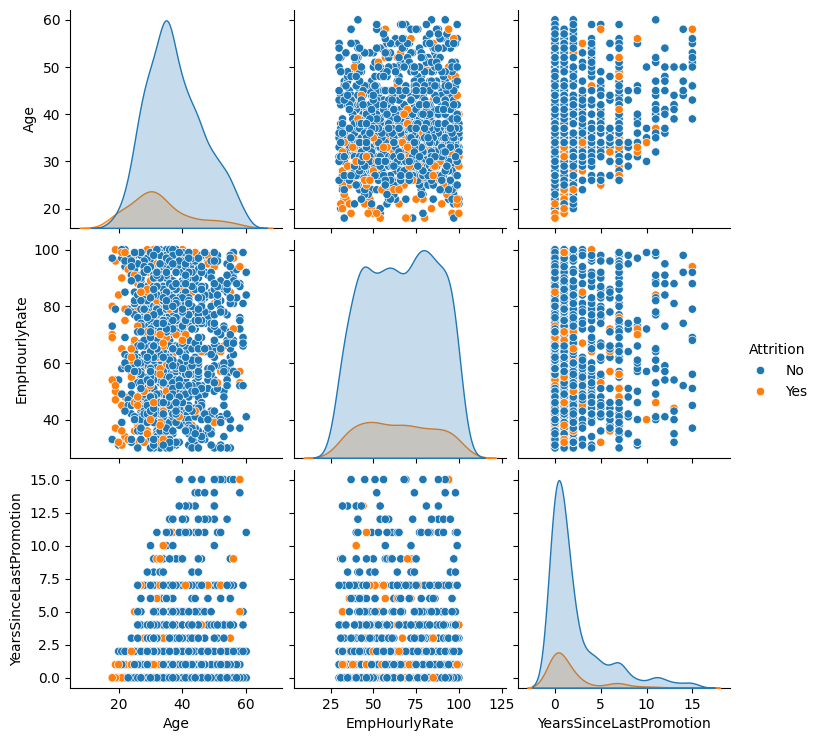

In [45]:
# Create a pair plot to visualize the relationships between Age, Hourly Rate, Years Since Last Promotion, and Attrition, colored by Attrition status.
sns.pairplot(data[['Age', 'EmpHourlyRate', 'YearsSinceLastPromotion', 'Attrition']], hue='Attrition')


## Feature Engineering

In [46]:
# Checking Null Value
data.isnull().sum()

EmpNumber                       0
Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

##### Droping 'EmpNumber' Column

In [47]:
#droping unique feature as EmpNumber
data.drop('EmpNumber',axis=1,inplace=True)
data.head()

Age Gender EducationBackground MaritalStatus    EmpDepartment  \
0   32   Male           Marketing        Single            Sales   
1   47   Male           Marketing        Single            Sales   
2   40   Male       Life Sciences       Married            Sales   
3   41   Male     Human Resources      Divorced  Human Resources   
4   60   Male           Marketing        Single            Sales   

        EmpJobRole BusinessTravelFrequency  DistanceFromHome  \
0  Sales Executive           Travel_Rarely                10   
1  Sales Executive           Travel_Rarely                14   
2  Sales Executive       Travel_Frequently                 5   
3          Manager           Travel_Rarely                10   
4  Sales Executive           Travel_Rarely                16   

   EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
0                  3                           4             55   
1                  4                           4             42   
2                  4                           4             48   
3                  4                           2             73   
4                  4                           1             84   

   EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
0                  3            2                   4                   1   
1                  3            2                   1                   2   
2                  2            3                   1                   5   
3                  2            5                   4                   3   
4                  3            2                   1                   8   

  OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
0       No                        12                            4   
1       No                        12                            4   
2      Yes                        21                            3   
3       No                        15                            2   
4       No                        14                            4   

   TotalWorkExperienceInYears  TrainingTimesLastYear  EmpWorkLifeBalance  \
0                          10                      2                   2   
1                          20                      2                   3   
2                          20                      2                   3   
3                          23                      2                   2   
4                          10                      1                   3   

   ExperienceYearsAtThisCompany  ExperienceYearsInCurrentRole  \
0                            10                             7   
1                             7                             7   
2                            18                            13   
3                            21                             6   
4                             2                             2   

   YearsSinceLastPromotion  YearsWithCurrManager Attrition  PerformanceRating  
0                        0                     8        No                  3  
1                        1                     7        No                  3  
2                        1                    12        No                  4  
3                       12                     6        No                  3  
4                        2                     2        No                  3

### Encoding

In [48]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Encoding Using Labelled Encoder

data['Gender']=encoder.fit_transform(data['Gender'])
data['EducationBackground']=encoder.fit_transform(data['EducationBackground'])
data['MaritalStatus']=encoder.fit_transform(data['MaritalStatus'])
data['EmpDepartment']=encoder.fit_transform(data['EmpDepartment'])
data['EmpJobRole']=encoder.fit_transform(data['EmpJobRole'])
data['BusinessTravelFrequency']=encoder.fit_transform(data['BusinessTravelFrequency'])
data['OverTime']=encoder.fit_transform(data['OverTime'])
data['Attrition']=encoder.fit_transform(data['Attrition'])

In [49]:
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   8         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                          10   
1                            4                          20   
2                            3                          20   
3                            2                          23   
4                            4                          10   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                            21   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                             7                        0   
1                             7                        1   
2                            13                        1   
3                             6                       12   
4                             2                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                     8          0                  3  
1                     7          0                  3  
2                    12          0                  4  
3                     6          0                  3  
4                     2          0                  3

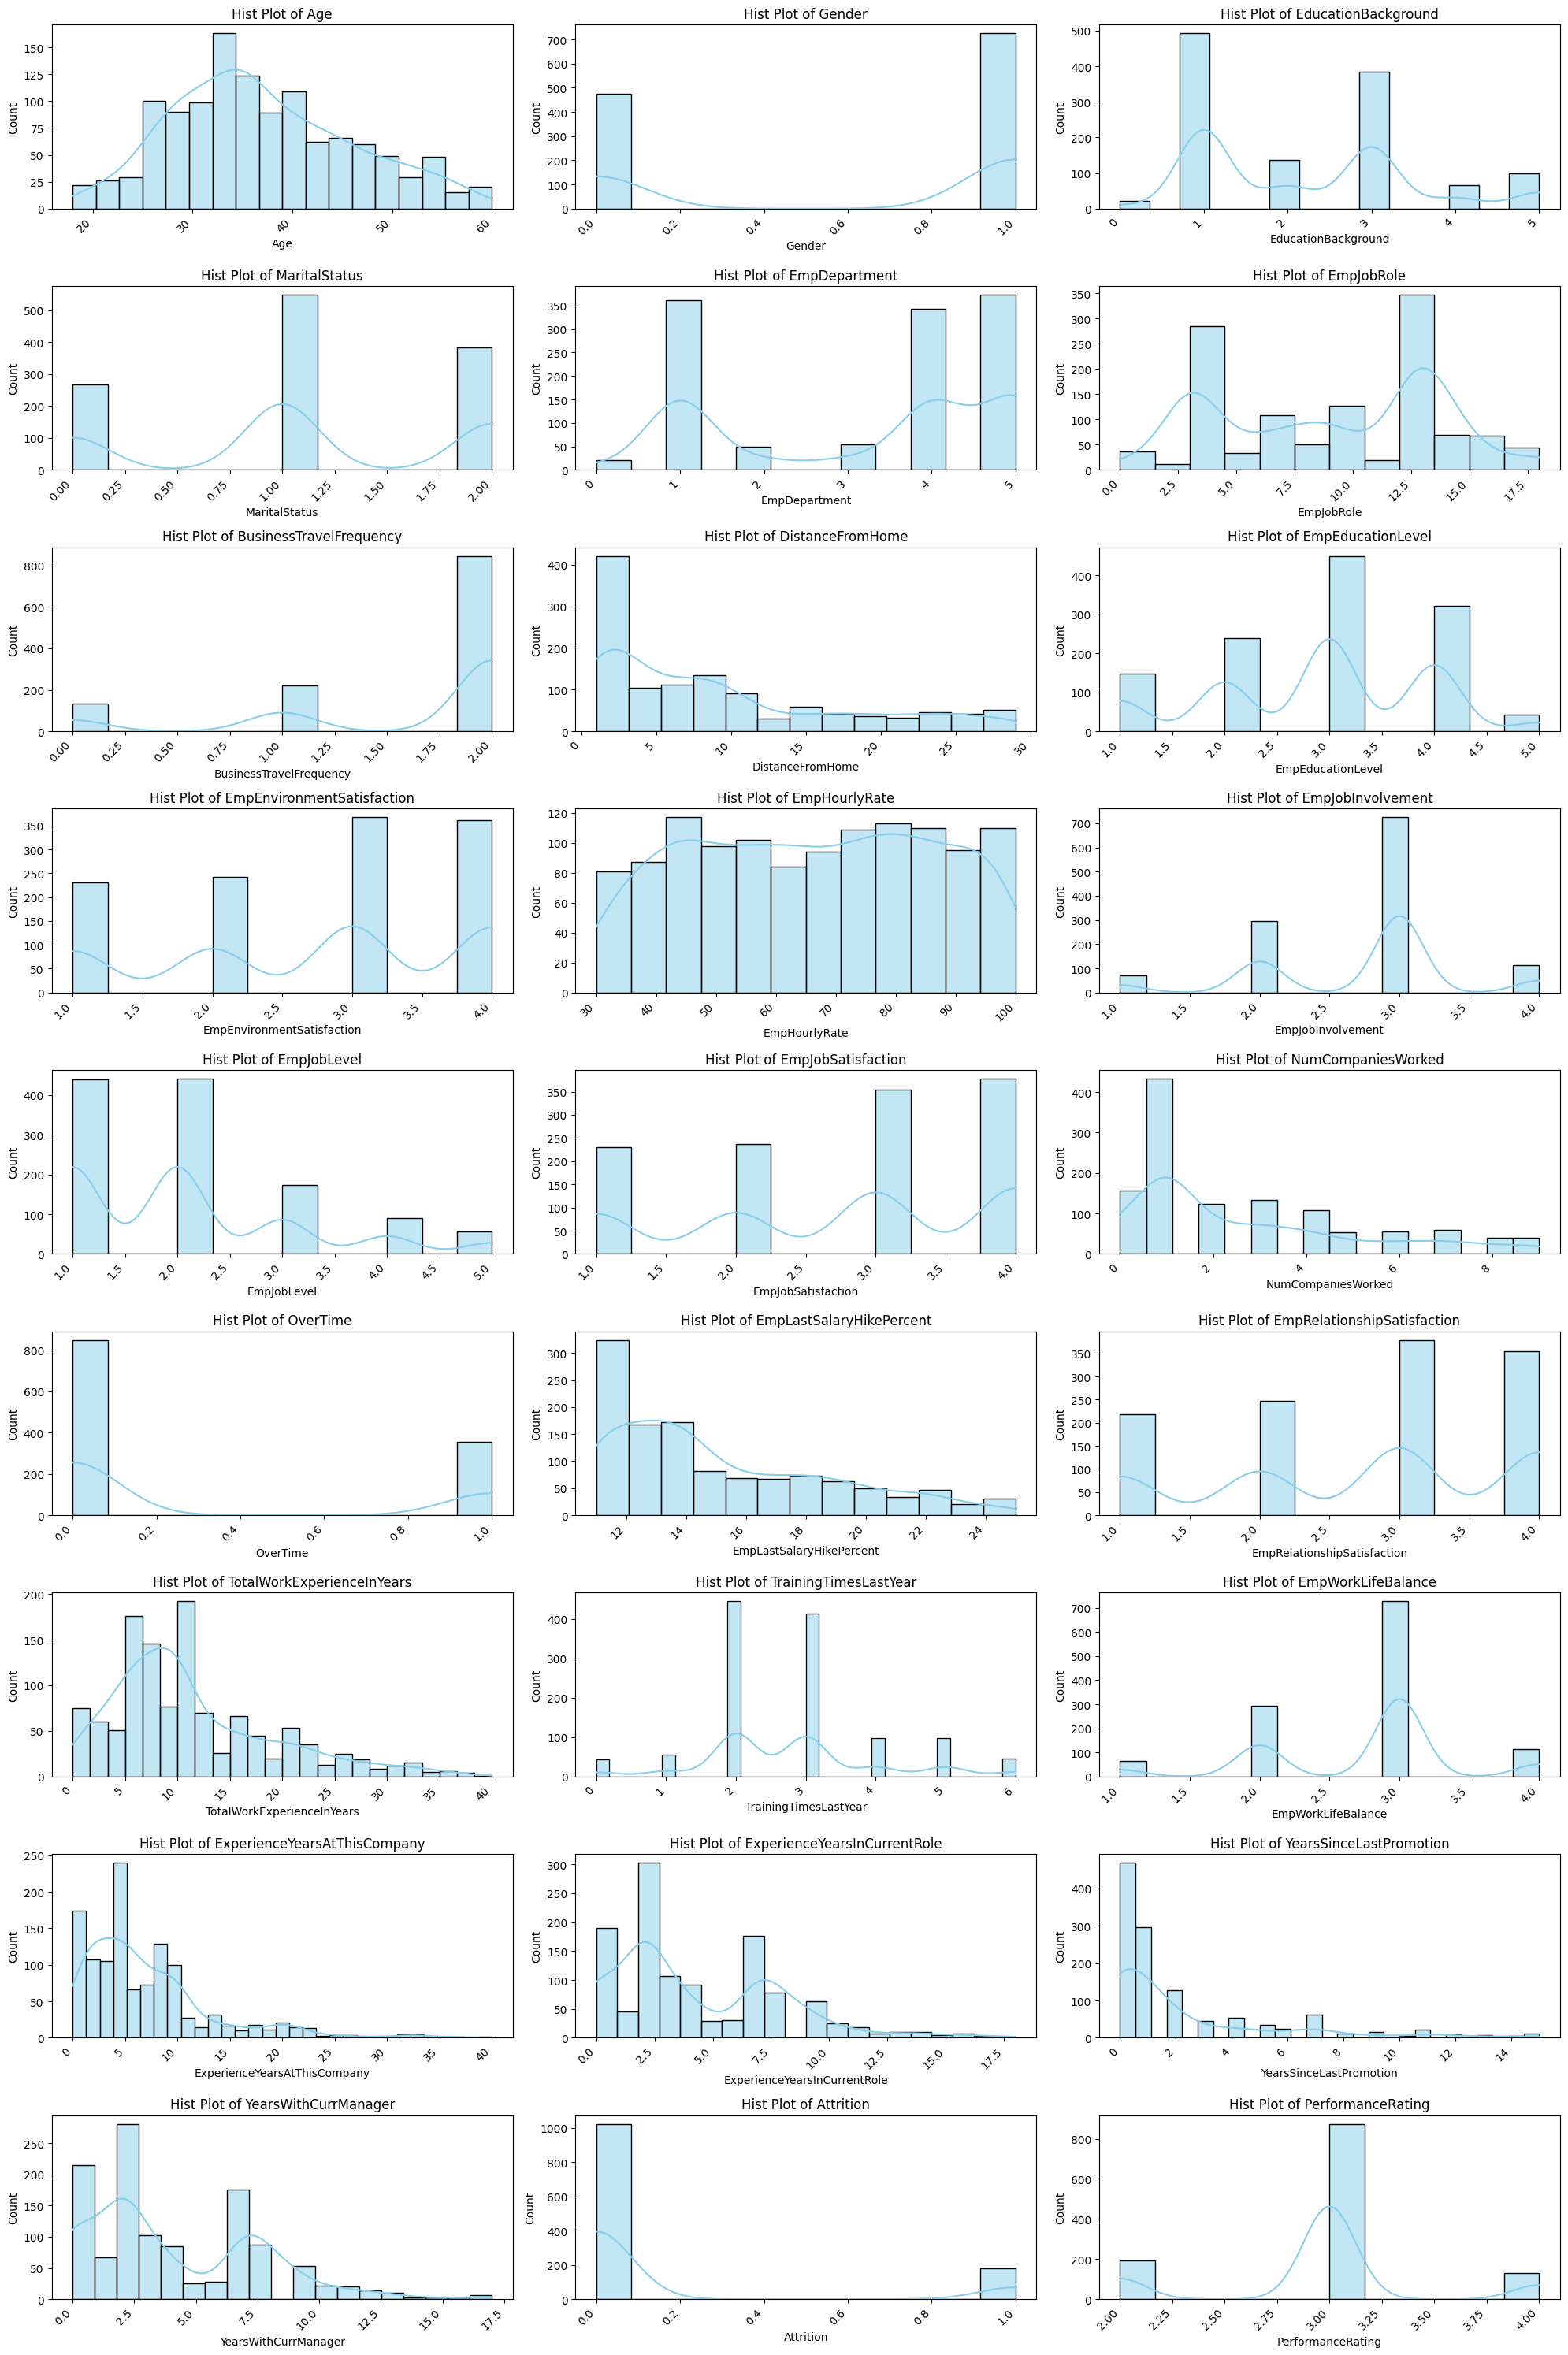

In [50]:
# visualize the distribution of each feature (column)
plt.figure(figsize=(20, 30))
for i, col in enumerate(data, 1):
    plt.subplot(9, 3, i)  # Adjust subplot layout as needed
    sns.histplot(data=data, x=col, color='skyblue',kde=True)
    plt.title(f'Hist Plot of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
# finding skewness and kurtosis to check the normalization of feature.
from scipy import stats
for column in data:
    skewness=stats.skew(data[column])
    kurtosis=stats.kurtosis(data[column])
    print(column,'skewness is :',skewness)
    print(column,'kurtosis is :',kurtosis)

Age skewness is : 0.3836646110785685
Age kurtosis is : -0.4342016798705739
Gender skewness is : -0.42601432284230467
Gender kurtosis is : -1.8185117967332127
EducationBackground skewness is : 0.5513749427617737
EducationBackground kurtosis is : -0.65174298239753
MaritalStatus skewness is : -0.15144003526169916
MaritalStatus kurtosis is : -1.119700089850293
EmpDepartment skewness is : -0.40791122659206125
EmpDepartment kurtosis is : -1.505003648253274
EmpJobRole skewness is : -0.11151335264121637
EmpJobRole kurtosis is : -1.25602866999997
BusinessTravelFrequency skewness is : -1.4010025618647997
BusinessTravelFrequency kurtosis is : 0.5486513912585655
DistanceFromHome skewness is : 0.9617520027440261
DistanceFromHome kurtosis is : -0.2460053857006934
EmpEducationLevel skewness is : -0.2506601284752214
EmpEducationLevel kurtosis is : -0.6379446256527972
EmpEnvironmentSatisfaction skewness is : -0.30728009854747024
EmpEnvironmentSatisfaction kurtosis is : -1.2055559189315166
EmpHourlyRate

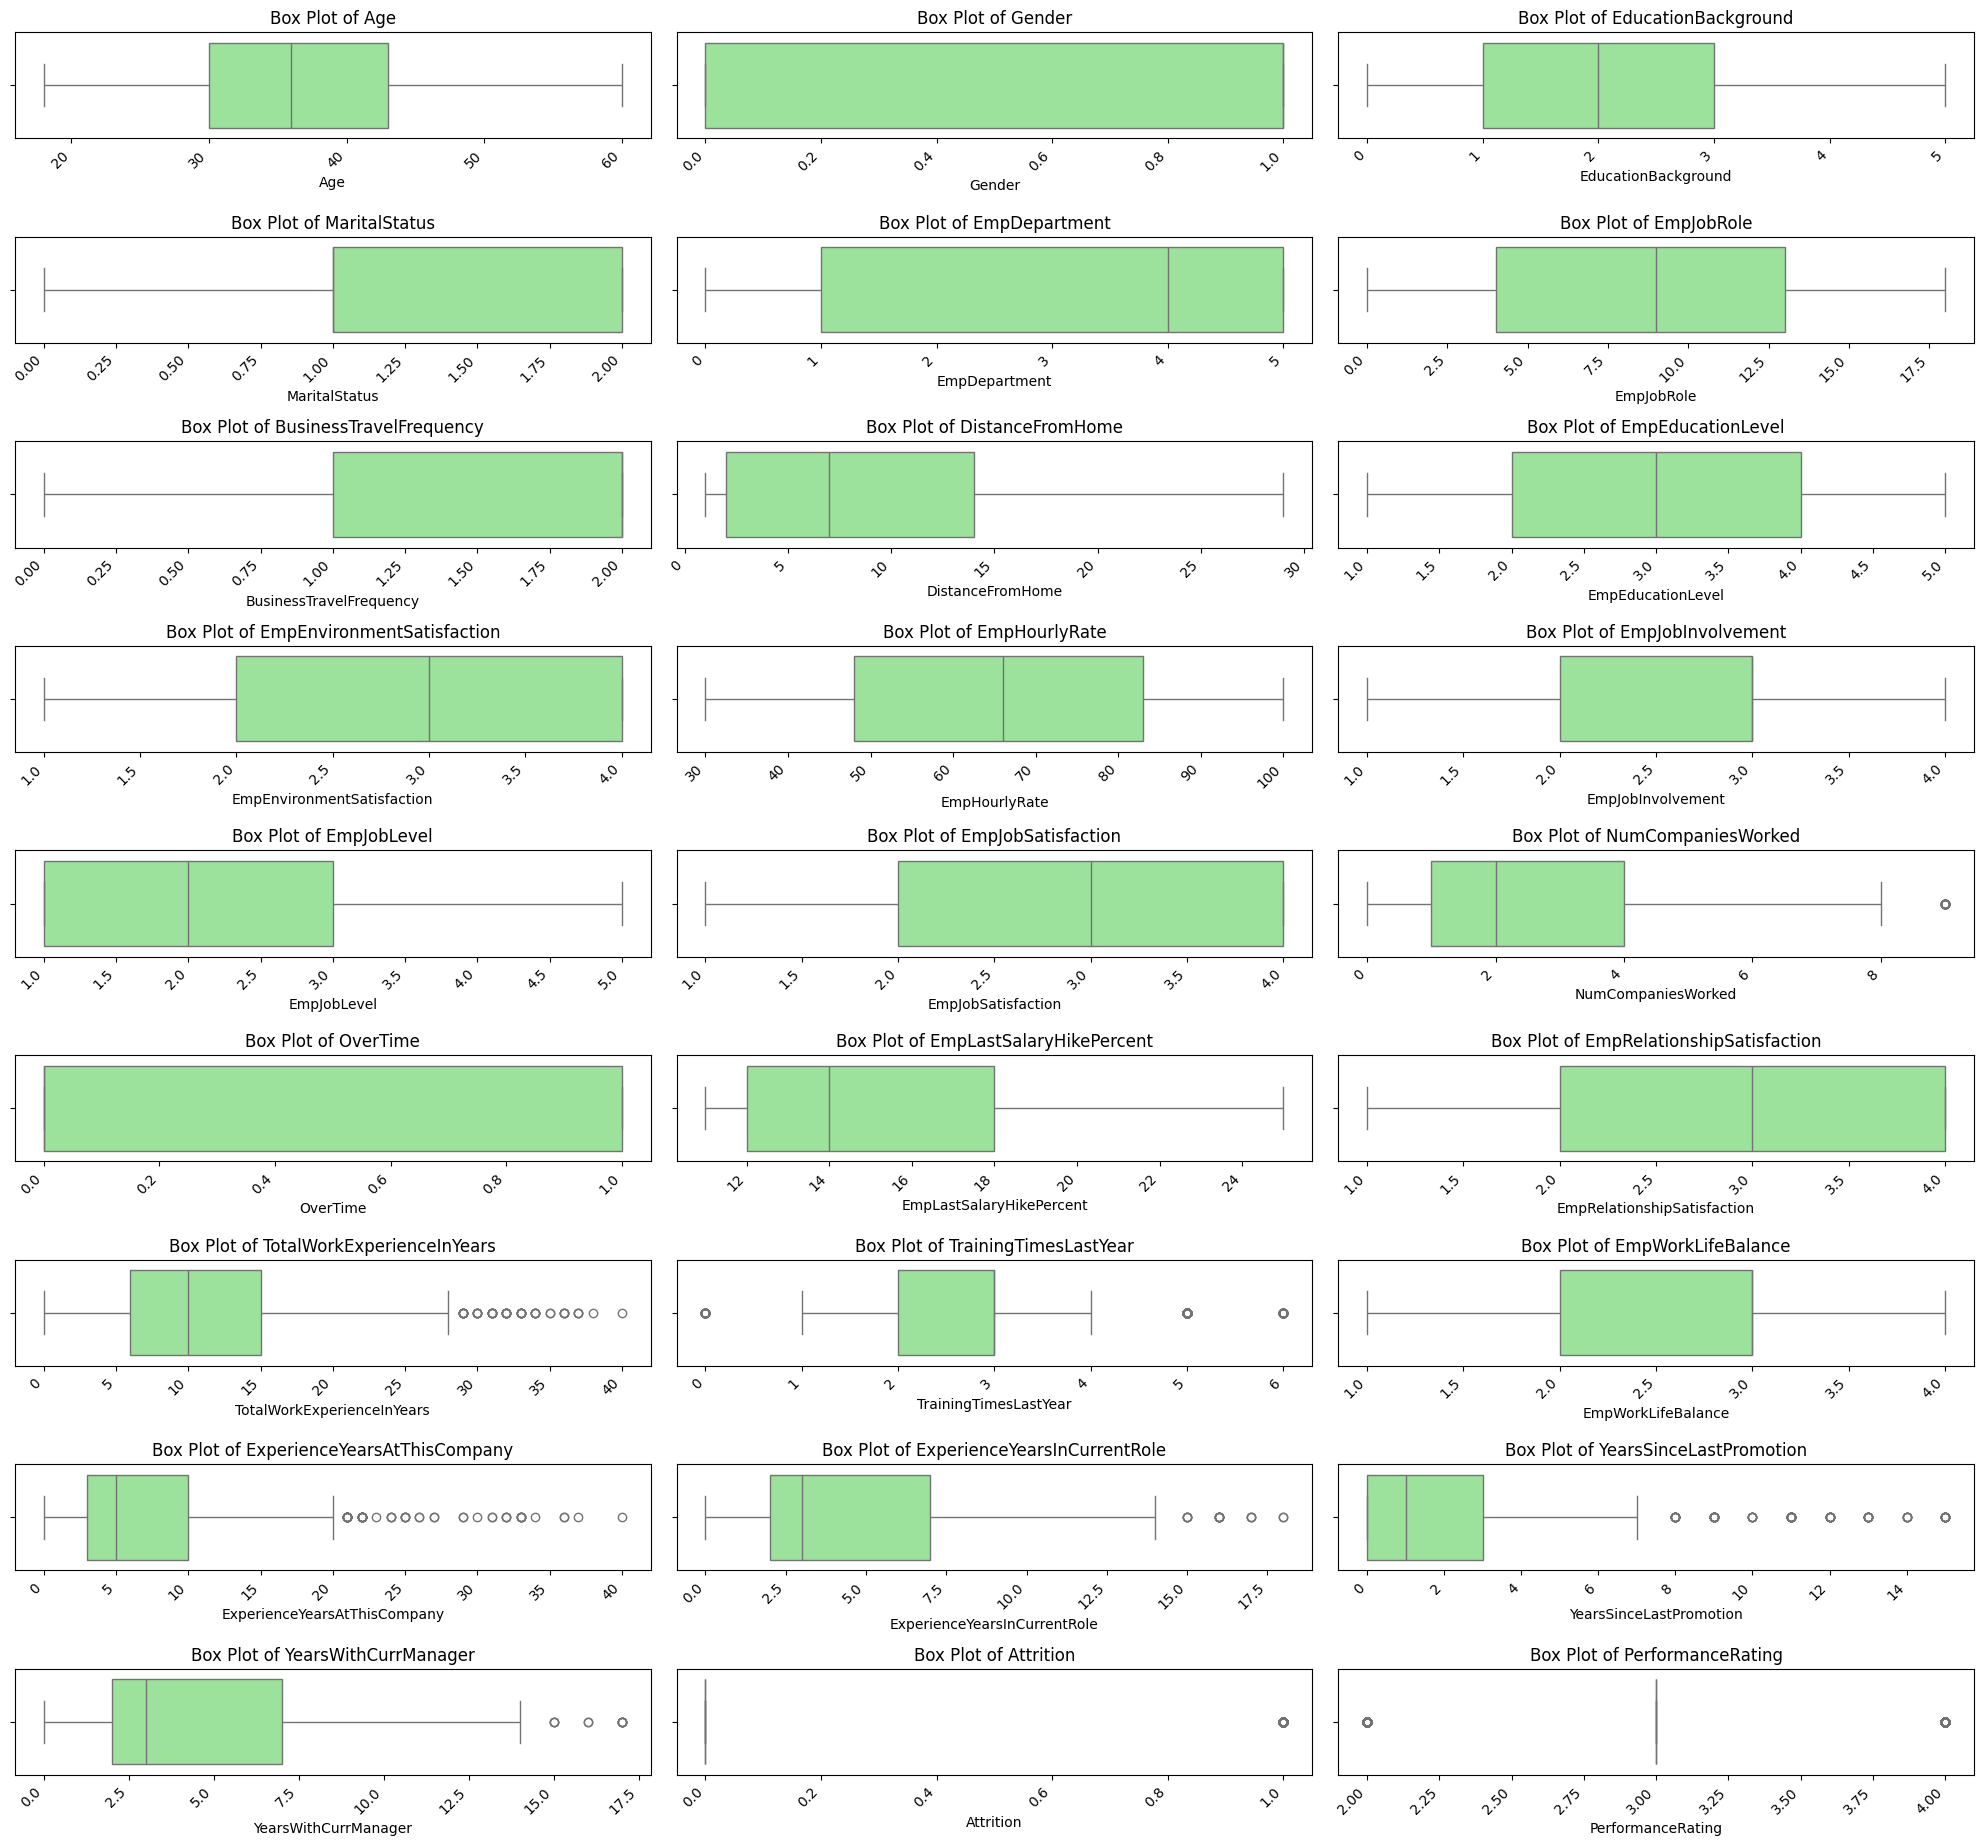

In [52]:
# Checking Outlier
# Visualize potential outliers in each feature using box plots.

# Select numerical columns and exclude 'EmpNumber'
numerical_cols = data.select_dtypes(include=['number']).columns
numerical_cols = numerical_cols[numerical_cols != 'EmpNumber']  # Exclude 'EmpNumber'

# Create box plots for numerical features
plt.figure(figsize=(20, 20))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols) // 3 + 1, 3, i)  # Adjust subplot layout as needed
    sns.boxplot(data=data, x=col, color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Managing Outliers in Data

* **Normal Distribution:** When data follows a normal distribution, outliers can be addressed using the empirical rule (68-95-99.7 rule) or the 3-sigma rule. These methods rely on the standard deviation to identify data points that are unusually far from the mean.
* **Non-normal Distribution:** If the data distribution is not normal (skewed), the Interquartile Range (IQR) method is more suitable for outlier removal. IQR focuses on the data points within the middle 50% of the distribution.
* **Normality Check:** A normal distribution typically exhibits skewness and kurtosis values falling within the range of -1 to +1. These statistical measures help assess the shape and symmetry of the distribution.

In [53]:
# TotalWorkExperienceInYears is normally distributed hence we use 3 sigma rule to remove outliers
lower_limit=data.TotalWorkExperienceInYears.mean() - 3*data.TotalWorkExperienceInYears.std()##calculating lower limit
print(lower_limit)

upper_limit=data.TotalWorkExperienceInYears.mean() + 3*data.TotalWorkExperienceInYears.std()#calculating upper limit
print(upper_limit)
data.loc[data['TotalWorkExperienceInYears']<lower_limit]#checking values which are less than minimum limit
data.loc[data['TotalWorkExperienceInYears']>upper_limit]#checking values which are greater than maximum limit
display(len(data.loc[data['TotalWorkExperienceInYears']>upper_limit])/1200) #checking percent of outliers
data.loc[data['TotalWorkExperienceInYears']>upper_limit,'TotalWorkExperienceInYears']=np.mean(data.TotalWorkExperienceInYears) #imputing value with mean as outliers percentage are less than 5%
display(data.loc[data['TotalWorkExperienceInYears']>upper_limit]) #reckeck

-12.061683901117005
34.721683901117004


0.009166666666666667

<ipython-input-53-dbb95f09dc7b>:10: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '11.33' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [54]:
# ExperienceYearsAtThisCompany is not normally distributed hence we use IQR rule to remove outliers
from scipy import stats
IQR = stats.iqr(data.ExperienceYearsAtThisCompany, interpolation = 'midpoint') #calculating Inter quantile range
display(IQR)
Q1=data.ExperienceYearsAtThisCompany.quantile(0.25)#defining 25% of data
Q3=data.ExperienceYearsAtThisCompany.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR #setting minimum limit
max_limit=Q3 + 1.5*IQR #setting maximum limit
display(data.loc[data['ExperienceYearsAtThisCompany']<min_limit]) #checking values which are less than minimum limit
display(data.loc[data['ExperienceYearsAtThisCompany']>max_limit])#checking values which are greater than maximum limit
display(len(data.loc[data['ExperienceYearsAtThisCompany']>max_limit])/18278)
#imputing outlier with with median
data.loc[data['ExperienceYearsAtThisCompany']>max_limit,'ExperienceYearsAtThisCompany']=np.median(data.ExperienceYearsAtThisCompany)
data.loc[data['ExperienceYearsAtThisCompany']>max_limit] #checking whether outlier remove or not

np.float64(7.0)

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
3      41       1                    0              0              3   
11     47       0                    3              0              5   
25     52       1                    2              1              5   
52     47       0                    4              1              1   
100    50       1                    1              0              1   
168    39       0                    1              1              4   
175    41       0                    1              0              4   
178    52       0                    2              1              5   
181    39       0                    3              2              4   
216    42       1                    3              1              4   
252    42       1                    1              2              5   
272    46       0                    2              1              5   
304    44       1                    2              1              5   
307    45       0                    2              2              5   
308    55       1                    3              0              4   
312    51       1                    1              0              5   
316    44       1                    1              0              4   
320    43       0                    2              2              5   
347    51       1                    1              0              3   
450    50       1                    3              2              4   
459    40       1                    3              2              3   
471    53       0                    5              1              4   
475    55       1                    2              1              5   
490    50       1                    3              1              2   
492    44       0                    3              0              2   
555    45       1                    1              1              4   
557    45       0                    5              2              4   
571    40       1                    3              2              5   
613    41       0                    2              0              5   
617    47       0                    1              0              4   
642    48       1                    1              1              4   
658    48       0                    3              0              4   
777    53       0                    1              1              5   
785    44       0                    3              1              1   
816    50       0                    3              0              1   
817    59       0                    1              2              5   
838    40       1                    1              1              1   
845    58       1                    3              2              5   
862    43       1                    1              1              5   
867    58       0                    3              1              1   
911    46       0                    2              0              5   
921    52       1                    1              1              1   
956    42       1                    5              1              1   
962    52       1                    1              2              5   
978    40       1                    3              0              0   
989    55       1                    3              2              1   
1015   41       1                    1              2              5   
1024   45       1                    1              0              1   
1027   39       1                    3              1              1   
1036   39       1                    3              1              1   
1086   43       1                    1              0              1   
1094   39       1                    1              0              1   
1104   60       0                    1              1              1   
1117   50       1                    1              1              1   
1156   49       1                    1        

0.003063792537476748

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [55]:
# ExperienceYearsInCurrentRole is normally distributed hence we use 3 sigma rule to remove outliers
lower_limit=data.ExperienceYearsInCurrentRole.mean() - 3*data.ExperienceYearsInCurrentRole.std()##calculating lower limit
display(lower_limit)

upper_limit=data.ExperienceYearsInCurrentRole.mean() + 3*data.ExperienceYearsInCurrentRole.std()#calculating upper limit
display(upper_limit)
display(data.loc[data['ExperienceYearsInCurrentRole']<lower_limit])#checking values which are less than minimum limit
display(data.loc[data['ExperienceYearsInCurrentRole']>upper_limit])#checking values which are greater than maximum limit
display(len(data.loc[data['ExperienceYearsInCurrentRole']>upper_limit])/1200) #checking percent of outliers
data.loc[data['ExperienceYearsInCurrentRole']>upper_limit,'ExperienceYearsInCurrentRole']=np.mean(data.ExperienceYearsInCurrentRole) #imputing value with mean as outliers percentage are less than 5%
display(data.loc[data['ExperienceYearsInCurrentRole']>upper_limit]) #reckeck

np.float64(-6.5495656709798675)

np.float64(15.132899004313202)

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
151    41       1                    3              0              1   
175    41       0                    1              0              4   
361    56       1                    1              1              4   
639    46       0                    5              0              5   
658    48       0                    3              0              4   
730    38       0                    3              1              4   
817    59       0                    1              2              5   
864    51       1                    1              2              1   
921    52       1                    1              1              1   
956    42       1                    5              1              1   
999    42       1                    1              1              5   
1152   41       0                    1              1              5   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
151            3                        1                 9   
175           11                        0                 7   
361            9                        2                23   
639           13                        2                 3   
658            8                        1                22   
730           11                        2                10   
817           13                        2                25   
864            3                        2                 6   
921            3                        2                 1   
956            3                        2                 4   
999           13                        2                 1   
1152           8                        2                 2   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
151                   3                           1             64   
175                   1                           2             55   
361                   3                           4             68   
639                   3                           1             45   
658                   3                           4             58   
730                   3                           2             99   
817                   3                           1             99   
864                   3                           1             51   
921                   4                           3             65   
956                   2                           3             58   
999                   1                           2             99   
1152                  5                           2             91   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
151                   3            5                   3                   2   
175                   1            5                   3                   1   
361                   3            4                   2                   4   
639                   4            4                   1                   2   
658                   3            4                   4                   3   
730                   1            3                   3                   3   
817                   3            3                   1                   7   
864                   3            5                   3                   7   
921                   2            5                   3                   0   
956                   3            5                   4                   1   
999                   3            2                   3                   1   
1152                  3            4                   1                   7   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
151          0                        17                            2   
175          0                        22                            2   
361          1                        12                            1   
639  

0.01

<ipython-input-55-be70c6d9abbb>:10: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.291666666666667' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [56]:
# YearsSinceLastPromotion is not normally distributed hence we use IQR rule to remove outliers
IQR = stats.iqr(data.YearsSinceLastPromotion, interpolation = 'midpoint') #calculating Inter quantile range
display(IQR)
Q1=data.YearsSinceLastPromotion.quantile(0.25)#defining 25% of data
Q3=data.YearsSinceLastPromotion.quantile(0.75)##defining 75% of data
min_limit=Q1 - 1.5*IQR #setting minimum limit
max_limit=Q3 + 1.5*IQR #setting maximum limit
display(data.loc[data['YearsSinceLastPromotion']<min_limit]) #checking values which are less than minimum limit
display(data.loc[data['YearsSinceLastPromotion']>max_limit])#checking values which are greater than maximum limit
display(len(data.loc[data['YearsSinceLastPromotion']>max_limit])/18278)
#imputing outlier with with median
data.loc[data['YearsSinceLastPromotion']>max_limit,'YearsSinceLastPromotion']=np.median(data.YearsSinceLastPromotion)
data.loc[data['YearsSinceLastPromotion']>max_limit] #checking whether outlier remove or not

np.float64(3.0)

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
3      41       1                    0              0              3   
11     47       0                    3              0              5   
100    50       1                    1              0              1   
130    31       0                    3              1              1   
132    37       1                    1              1              5   
...   ...     ...                  ...            ...            ...   
1152   41       0                    1              1              5   
1160   50       1                    3              1              3   
1181   34       1                    1              1              1   
1185   35       1                    1              2              1   
1189   33       1                    1              2              1   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
3              8                        2                10   
11            13                        1                 3   
100            3                        0                 2   
130            3                        2                12   
132           13                        2                 1   
...          ...                      ...               ...   
1152           8                        2                 2   
1160           8                        1                 3   
1181          15                        2                 1   
1185          15                        2                 6   
1189          15                        1                 3   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
3                     4                           2             73   
11                    3                           4             49   
100                   4                           1             98   
130                   3                           4             41   
132                   4                           1             46   
...                 ...                         ...            ...   
1152                  5                           2             91   
1160                  3                           1             99   
1181                  5                           2             42   
1185                  4                           2             82   
1189                  3                           1             70   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
3                     2            5                   4                   3   
11                    3            4                   3                   9   
100                   3            4                   1                   1   
130                   3            2                   4                   0   
132                   2            3                   3                   5   
...                 ...          ...                 ...                 ...   
1152                  3            4                   1                   7   
1160                  3            5                   2                   1   
1181                  3            1                   4                   1   
1185                  1            2                   4                   1   
1189                  3            1                   1                   1   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
3            0                        15                            2   
11           1                        12                            4   
100          0                        11                            4   
130          1                        11                            3   
132          0                        11                            3   
...        ...                       ...                          ...   
1152         0                        16                            2  

0.004814531130320604

Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [57]:
# YearsWithCurrManager is normally distributed hence we use 3 sigma rule to remove outliers
lower_limit=data.YearsWithCurrManager.mean() - 3*data.YearsWithCurrManager.std()##calculating lower limit
print(lower_limit)

upper_limit=data.YearsWithCurrManager.mean() + 3*data.YearsWithCurrManager.std()#calculating upper limit
print(upper_limit)
display(data.loc[data['YearsWithCurrManager']<lower_limit])#checking values which are less than minimum limit
display(data.loc[data['YearsWithCurrManager']>upper_limit])#checking values which are greater than maximum limit
display(len(data.loc[data['YearsWithCurrManager']>upper_limit])/1200) #checking percent of outliers
data.loc[data['YearsWithCurrManager']>upper_limit,'YearsWithCurrManager']=np.mean(data.YearsWithCurrManager) #imputing value with mean as outliers percentage are less than 5%
display(data.loc[data['YearsWithCurrManager']>upper_limit]) #reckeck

-6.519728029684055
14.729728029684056


Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
25     52       1                    2              1              5   
72     51       0                    2              1              5   
126    41       1                    3              2              1   
283    44       1                    4              2              4   
320    43       0                    2              2              5   
655    40       1                    1              0              4   
785    44       0                    3              1              1   
864    51       1                    1              2              1   
888    45       1                    1              0              1   
956    42       1                    5              1              1   
1083   37       0                    1              0              1   

      EmpJobRole  BusinessTravelFrequency  DistanceFromHome  \
25             8                        2                 3   
72             8                        2                26   
126            3                        2                 6   
283           12                        2                29   
320           13                        2                 4   
655            9                        2                 1   
785            3                        2                 7   
864            3                        2                 6   
888            3                        2                 9   
956            3                        2                 4   
1083           2                        2                14   

      EmpEducationLevel  EmpEnvironmentSatisfaction  EmpHourlyRate  \
25                    4                           3             31   
72                    4                           1             66   
126                   3                           4             59   
283                   4                           4             32   
320                   4                           4             56   
655                   4                           1             98   
785                   4                           1             42   
864                   3                           1             51   
888                   3                           2             60   
956                   2                           3             58   
1083                  3                           4             95   

      EmpJobInvolvement  EmpJobLevel  EmpJobSatisfaction  NumCompaniesWorked  \
25                    2            4                   1                   1   
72                    3            4                   3                   2   
126                   3            1                   1                   2   
283                   3            2                   4                   1   
320                   2            3                   4                   3   
655                   3            4                   1                   2   
785                   2            3                   4                   3   
864                   3            5                   3                   7   
888                   3            2                   2                   8   
956                   3            5                   4                   1   
1083                  3            1                   1                   1   

      OverTime  EmpLastSalaryHikePercent  EmpRelationshipSatisfaction  \
25           0                        11                            1   
72           0                        14                            3   
126          1                        13                            3   
283          0                        25                            2   
320          0                        14                            4   
655          0                        11                            1   
785          0                        14                            4  

0.009166666666666667

<ipython-input-57-089e1a810680>:10: FutureWarning:

Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '4.105' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.



Empty DataFrame
Columns: [Age, Gender, EducationBackground, MaritalStatus, EmpDepartment, EmpJobRole, BusinessTravelFrequency, DistanceFromHome, EmpEducationLevel, EmpEnvironmentSatisfaction, EmpHourlyRate, EmpJobInvolvement, EmpJobLevel, EmpJobSatisfaction, NumCompaniesWorked, OverTime, EmpLastSalaryHikePercent, EmpRelationshipSatisfaction, TotalWorkExperienceInYears, TrainingTimesLastYear, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, YearsWithCurrManager, Attrition, PerformanceRating]
Index: []

In [58]:

data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  EmpJobRole  \
0   32       1                    2              2              5          13   
1   47       1                    2              2              5          13   
2   40       1                    1              1              5          13   
3   41       1                    0              0              3           8   
4   60       1                    2              2              5          13   

   BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0                        2                10                  3   
1                        2                14                  4   
2                        1                 5                  4   
3                        2                10                  4   
4                        2                16                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4             55                  3            2   
1                           4             42                  3            2   
2                           4             48                  2            3   
3                           2             73                  2            5   
4                           1             84                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                        12   
1                   1                   2         0                        12   
2                   1                   5         1                        21   
3                   4                   3         0                        15   
4                   1                   8         0                        14   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                        10.0   
1                            4                        20.0   
2                            3                        20.0   
3                            2                        23.0   
4                            4                        10.0   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0                      2                   2                            10   
1                      2                   3                             7   
2                      2                   3                            18   
3                      2                   2                             5   
4                      1                   3                             2   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                           7.0                        0   
1                           7.0                        1   
2                          13.0                        1   
3                           6.0                        1   
4                           2.0                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0                   8.0          0                  3  
1                   7.0          0                  3  
2                  12.0          0                  4  
3                   6.0          0                  3  
4                   2.0          0                  3

### Scalling the Data

In [59]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
data[['Age','DistanceFromHome','EmpHourlyRate','EmpLastSalaryHikePercent','TotalWorkExperienceInYears',
      'TrainingTimesLastYear','ExperienceYearsAtThisCompany','ExperienceYearsInCurrentRole','YearsWithCurrManager',
      'YearsWithCurrManager']]=scale.fit_transform(data[['Age','DistanceFromHome','EmpHourlyRate',
      'EmpLastSalaryHikePercent','TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
      'ExperienceYearsInCurrentRole','YearsWithCurrManager','YearsWithCurrManager']])
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0 -0.541458       1                    2              2              5   
1  1.109888       1                    2              2              5   
2  0.339260       1                    1              1              5   
3  0.449349       1                    0              0              3   
4  2.541054       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2          0.102061                  3   
1          13                        2          0.591464                  4   
2          13                        1         -0.509693                  4   
3           8                        2          0.102061                  4   
4          13                        2          0.836165                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4      -0.543569                  3            2   
1                           4      -1.187042                  3            2   
2                           4      -0.890055                  2            3   
3                           2       0.347393                  2            5   
4                           1       0.891870                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                 -0.889111   
1                   1                   2         0                 -0.889111   
2                   1                   5         1                  1.594054   
3                   4                   3         0                 -0.061389   
4                   1                   8         0                 -0.337297   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                   -0.148321   
1                            4                    1.202479   
2                            3                    1.202479   
3                            2                    1.607719   
4                            4                   -0.148321   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0              -0.622235                   2                      0.868276   
1              -0.622235                   3                      0.200371   
2              -0.622235                   3                      2.649355   
3              -0.622235                   2                     -0.244898   
4              -1.414051                   3                     -0.912803   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      0.834290                        0   
1                      0.834290                        1   
2                      2.602323                        1   
3                      0.539618                        1   
4                     -0.639070                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0              1.199546          0                  3  
1              0.900149          0                  3  
2              2.397136          0                  4  
3              0.600752          0                  3  
4             -0.596837          0                  3

### Feature Selection

* Our dataset contains numerous features. To identify the most influential features for predicting the target variable, we utilize the correlation coefficient. This statistical measure helps determine the strength and direction of the linear relationship between features and the target. The features exhibiting a significant correlation with the target are then selected for model training.
* Feature selection also reveals the top factors impacting employee performance. In our analysis, the most important features include: Department, Job Role, Environment Satisfaction, Last Salary Hike Percent, Work Life Balance, Experience Years At This Company, Experience Years In Current Role, Years Since Last Promotion, and Years With Current Manager. These features were chosen due to their correlation coefficient with Performance Rating exceeding 0.1, indicating a notable relationship.
* To ensure optimal model performance, we employed standardization and label encoding techniques for feature transformation. Standardization scales numerical features to a standard normal distribution, while label encoding converts categorical features into numerical representations.
* Based on the correlation analysis, the three most critical factors influencing employee performance are:
1. Employee Environment Satisfaction
2. Employee Last Salary Hike Percent
3. EmpWorkLifeBalance

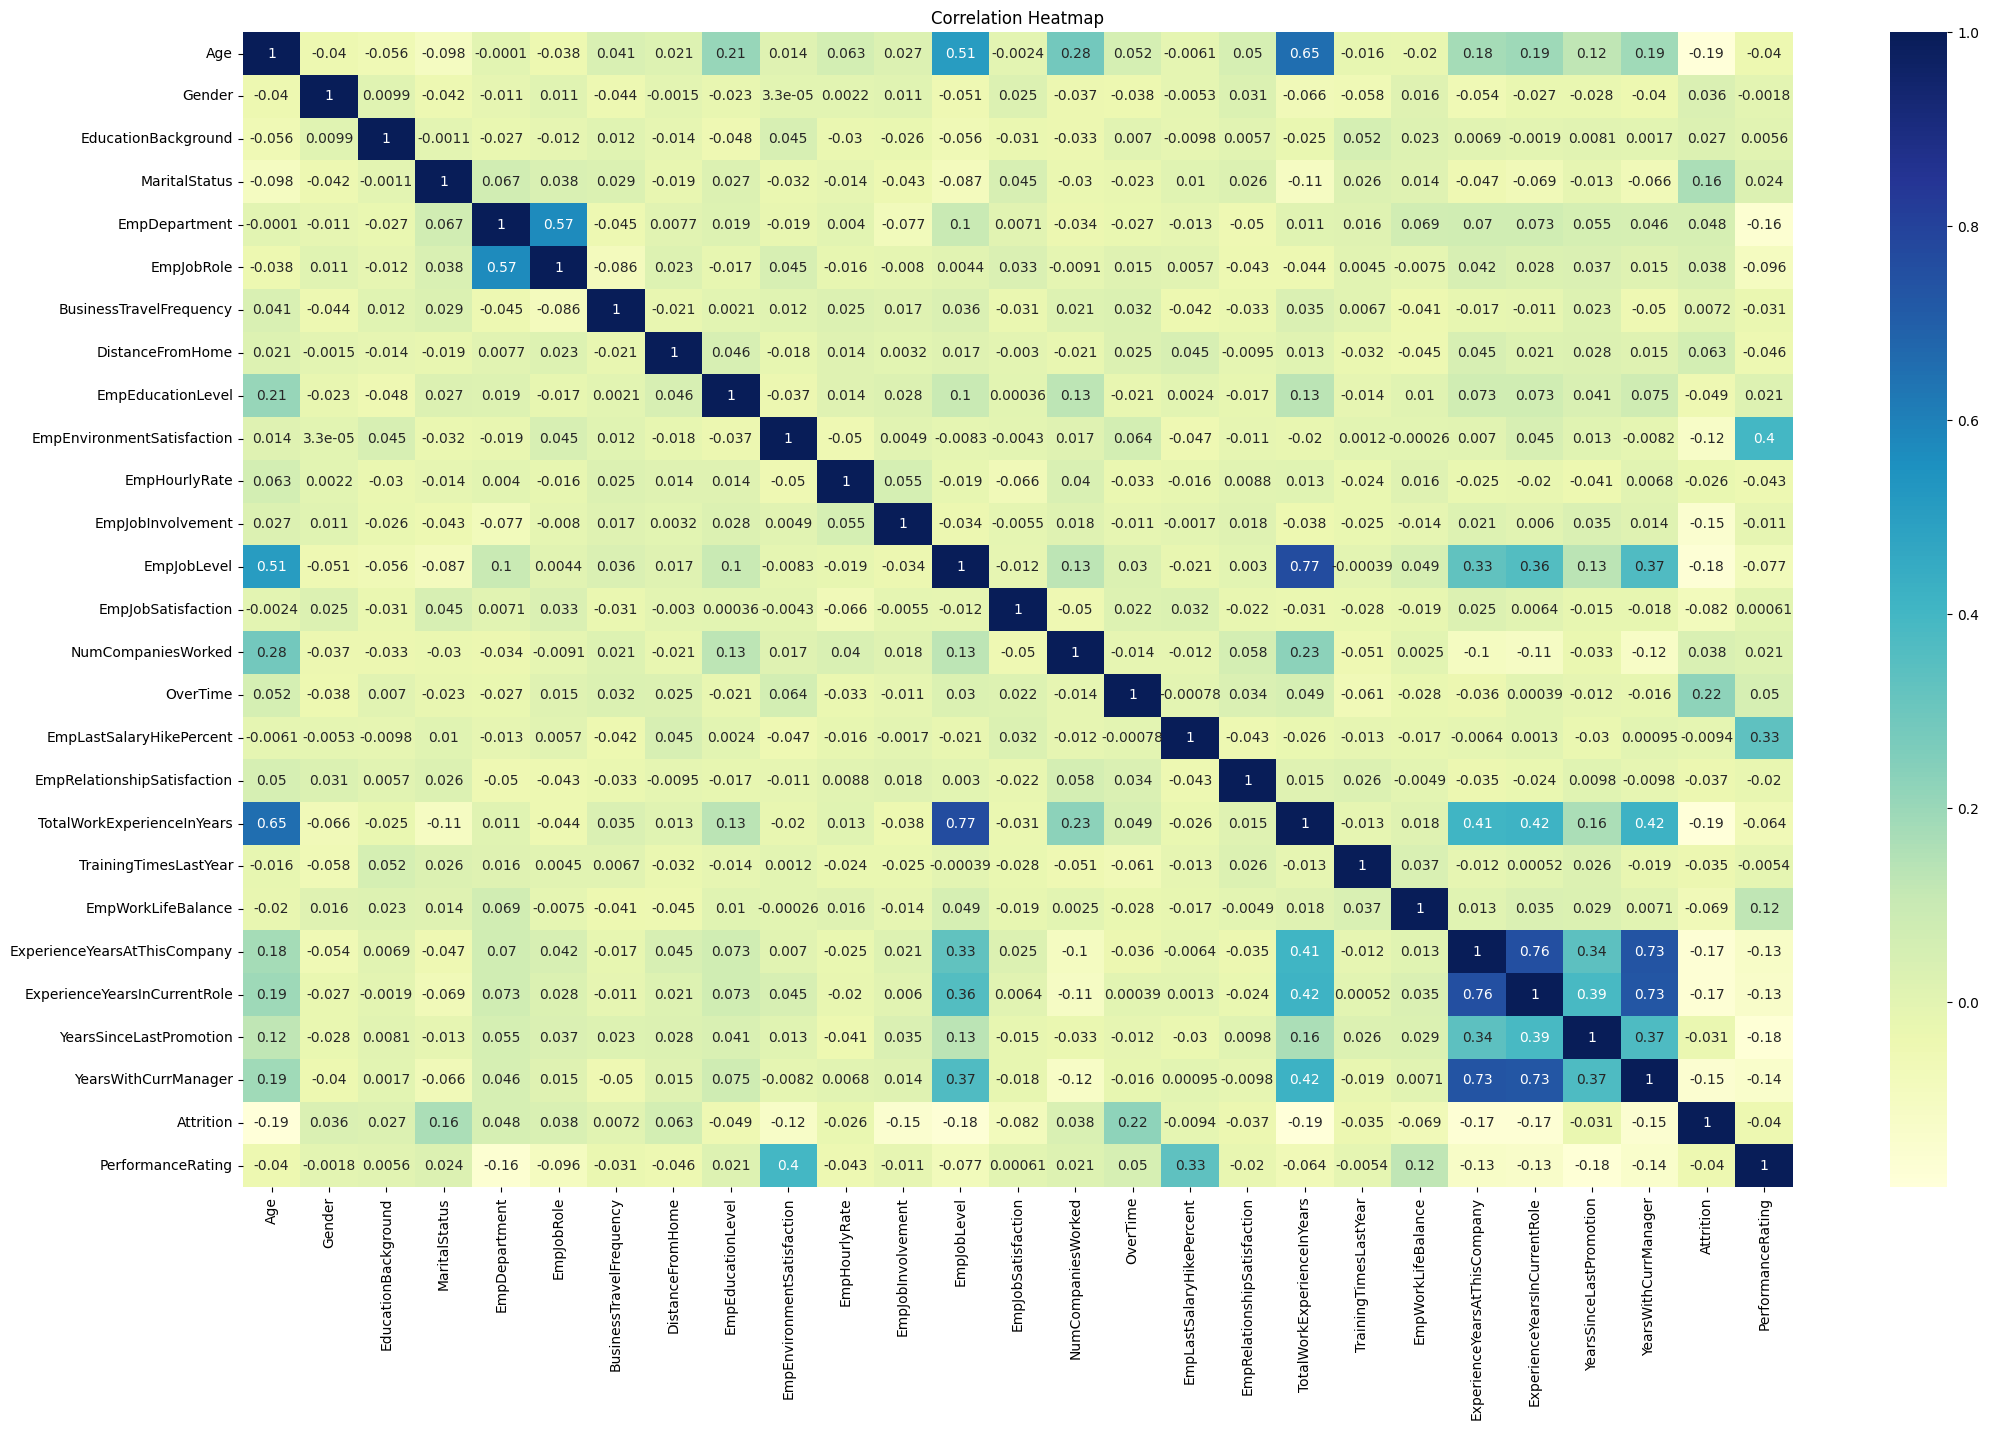

In [60]:
# Checking Correlation using Heatmap
plt.figure(figsize=(25, 15))  # Set the figure size for better readability
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=True, cmap="YlGnBu")  # Create a heatmap to visualize correlations between numerical features
plt.title("Correlation Heatmap")  # Set the title of the heatmap
plt.show()  # Display the heatmap

### Feature Selection Based on Correlation:
For model training, we selected features demonstrating a substantial correlation (coefficient greater than 0.1) with the target variable, as these features significantly contribute to predicting the target outcome.

The selected features are: EmpDepartment, EmpJobRole, EmpEnvironmentSatisfaction, EmpLastSalaryHikePercent, EmpWorkLifeBalance, ExperienceYearsAtThisCompany, ExperienceYearsInCurrentRole, YearsSinceLastPromotion, and YearsWithCurrManager.


In [61]:
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0 -0.541458       1                    2              2              5   
1  1.109888       1                    2              2              5   
2  0.339260       1                    1              1              5   
3  0.449349       1                    0              0              3   
4  2.541054       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2          0.102061                  3   
1          13                        2          0.591464                  4   
2          13                        1         -0.509693                  4   
3           8                        2          0.102061                  4   
4          13                        2          0.836165                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4      -0.543569                  3            2   
1                           4      -1.187042                  3            2   
2                           4      -0.890055                  2            3   
3                           2       0.347393                  2            5   
4                           1       0.891870                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                 -0.889111   
1                   1                   2         0                 -0.889111   
2                   1                   5         1                  1.594054   
3                   4                   3         0                 -0.061389   
4                   1                   8         0                 -0.337297   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                   -0.148321   
1                            4                    1.202479   
2                            3                    1.202479   
3                            2                    1.607719   
4                            4                   -0.148321   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0              -0.622235                   2                      0.868276   
1              -0.622235                   3                      0.200371   
2              -0.622235                   3                      2.649355   
3              -0.622235                   2                     -0.244898   
4              -1.414051                   3                     -0.912803   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      0.834290                        0   
1                      0.834290                        1   
2                      2.602323                        1   
3                      0.539618                        1   
4                     -0.639070                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0              1.199546          0                  3  
1              0.900149          0                  3  
2              2.397136          0                  4  
3              0.600752          0                  3  
4             -0.596837          0                  3

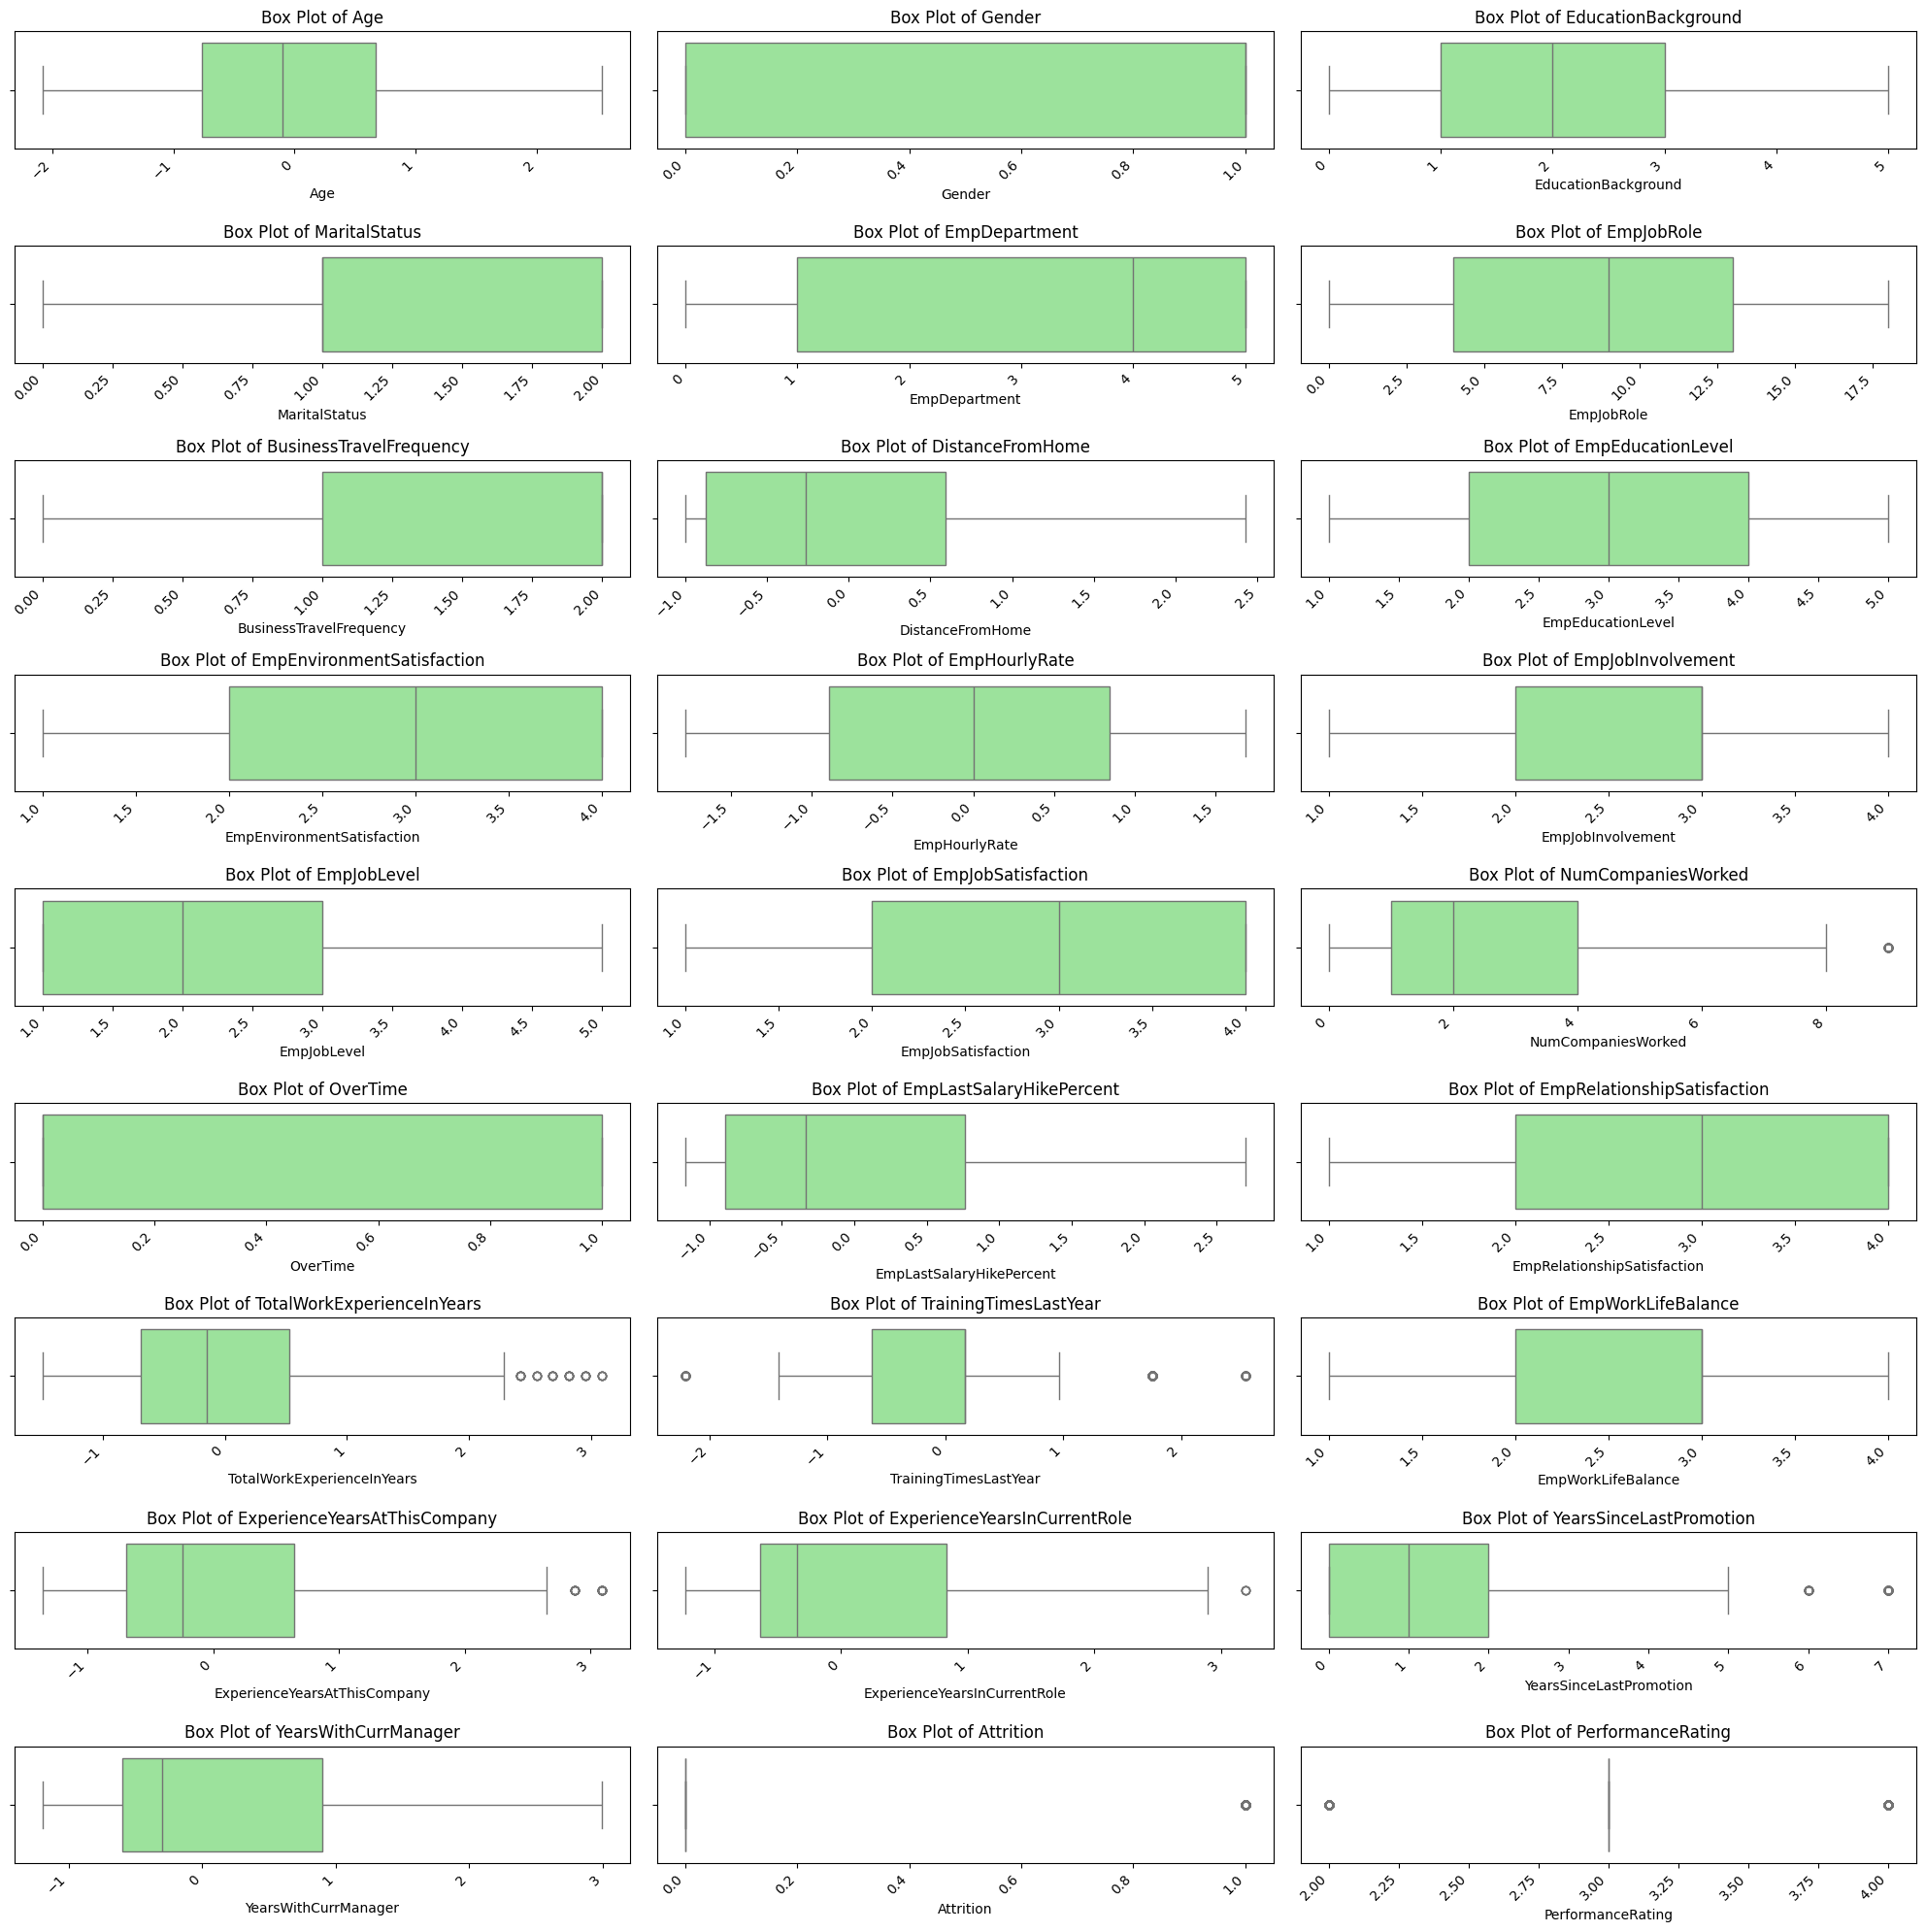

In [62]:
# Re-Checking Outlier
# Visualize potential outliers in each feature using box plots.
# Create box plots for numerical features
plt.figure(figsize=(20, 20))
for i, col in enumerate(data, 1):
    plt.subplot(9,3, i)  # Adjust subplot layout as needed
    sns.boxplot(data=data, x=col, color='lightgreen')
    plt.title(f'Box Plot of {col}')
    plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [63]:
# checking duplicate value
data.duplicated().sum()

np.int64(0)

In [64]:
# Display the first few rows of the DataFrame to get a quick overview of the data's structure and content.
data.head()

Age  Gender  EducationBackground  MaritalStatus  EmpDepartment  \
0 -0.541458       1                    2              2              5   
1  1.109888       1                    2              2              5   
2  0.339260       1                    1              1              5   
3  0.449349       1                    0              0              3   
4  2.541054       1                    2              2              5   

   EmpJobRole  BusinessTravelFrequency  DistanceFromHome  EmpEducationLevel  \
0          13                        2          0.102061                  3   
1          13                        2          0.591464                  4   
2          13                        1         -0.509693                  4   
3           8                        2          0.102061                  4   
4          13                        2          0.836165                  4   

   EmpEnvironmentSatisfaction  EmpHourlyRate  EmpJobInvolvement  EmpJobLevel  \
0                           4      -0.543569                  3            2   
1                           4      -1.187042                  3            2   
2                           4      -0.890055                  2            3   
3                           2       0.347393                  2            5   
4                           1       0.891870                  3            2   

   EmpJobSatisfaction  NumCompaniesWorked  OverTime  EmpLastSalaryHikePercent  \
0                   4                   1         0                 -0.889111   
1                   1                   2         0                 -0.889111   
2                   1                   5         1                  1.594054   
3                   4                   3         0                 -0.061389   
4                   1                   8         0                 -0.337297   

   EmpRelationshipSatisfaction  TotalWorkExperienceInYears  \
0                            4                   -0.148321   
1                            4                    1.202479   
2                            3                    1.202479   
3                            2                    1.607719   
4                            4                   -0.148321   

   TrainingTimesLastYear  EmpWorkLifeBalance  ExperienceYearsAtThisCompany  \
0              -0.622235                   2                      0.868276   
1              -0.622235                   3                      0.200371   
2              -0.622235                   3                      2.649355   
3              -0.622235                   2                     -0.244898   
4              -1.414051                   3                     -0.912803   

   ExperienceYearsInCurrentRole  YearsSinceLastPromotion  \
0                      0.834290                        0   
1                      0.834290                        1   
2                      2.602323                        1   
3                      0.539618                        1   
4                     -0.639070                        2   

   YearsWithCurrManager  Attrition  PerformanceRating  
0              1.199546          0                  3  
1              0.900149          0                  3  
2              2.397136          0                  4  
3              0.600752          0                  3  
4             -0.596837          0                  3

In [65]:
# Get the dimensions (rows, columns) of the DataFrame to understand the size of the dataset.
data.shape

(1200, 27)

## Now Splitting Data

In [66]:
# Splitting the data into features (X) and target (y)
X = data.drop(columns=["PerformanceRating"])  # Features: All columns except PerformanceRating
y = data["PerformanceRating"]  # Target: The PerformanceRating column

In [67]:
# Check the distribution of the target variable PerformanceRating .
y.value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64


**SMOTE:** SMOTE, or Synthetic Minority Oversampling Technique, is a popular method for addressing imbalanced datasets. It works by generating new synthetic samples of the minority class to balance the class distribution. SMOTE achieves this by creating new data points that lie between existing minority class samples

In [68]:
# Handling class imbalance using SMOTE (Synthetic Minority Over-sampling Technique)
from collections import Counter  # For counting the occurrences of each class in the target variable
from imblearn.over_sampling import SMOTE  # Importing the SMOTE class for over-sampling
smt = SMOTE()  # Creating an instance of the SMOTE class
print("unbalanced data   :  ", Counter(y))  # Displaying the class distribution before SMOTE
X_smote, y_smote = smt.fit_resample(X, y)  # Applying SMOTE to balance the dataset
print("balanced data:    :", Counter(y_smote))  # Displaying the class distribution after SMOTE

unbalanced data   :   Counter({3: 874, 2: 194, 4: 132})
balanced data:    : Counter({3: 874, 4: 874, 2: 874})


In [69]:
from sklearn.model_selection import train_test_split # Importing the function to split the data
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=10)
# Splitting the data into training and testing sets
# X_smote, y_smote: The features and target data (balanced using SMOTE)
# test_size=0.3: 30% of the data will be used for testing
# random_state=10: Ensures consistent splitting for reproducibility

## Let's Import Logistic Regression

In [70]:
from sklearn.linear_model import LogisticRegression # Importing the Logistic Regression model

lr = LogisticRegression() # Creating an instance of the Logistic Regression model
lr.fit(X_train, y_train) # Training the Logistic Regression model on the training data

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [71]:
y_train_pred_lr = lr.predict(X_train) # Generating predictions on the training data using the trained Logistic Regression model
y_train_pred_lr # Displaying the predictions made on the training data

array([3, 4, 2, ..., 2, 4, 2])

In [72]:
y_test_pred_lr = lr.predict(X_test) # Generating predictions on the testing data using the trained Logistic Regression model
y_test_pred_lr # Displaying the predictions made on the testing data

array([2, 2, 2, 3, 4, 3, 2, 4, 3, 4, 2, 4, 4, 3, 2, 4, 4, 4, 3, 4, 3, 2,
       3, 2, 3, 4, 2, 2, 3, 2, 4, 3, 4, 3, 2, 2, 4, 2, 4, 3, 4, 3, 2, 4,
       3, 2, 4, 2, 3, 4, 4, 4, 2, 3, 2, 4, 4, 4, 2, 3, 4, 2, 4, 2, 3, 2,
       3, 4, 2, 4, 4, 4, 4, 4, 3, 2, 4, 3, 4, 4, 2, 4, 3, 2, 3, 3, 2, 4,
       2, 2, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 3, 3, 4, 3, 4, 3, 2, 2, 4, 2,
       2, 4, 3, 2, 3, 3, 3, 2, 4, 4, 3, 2, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4,
       2, 2, 3, 4, 3, 2, 3, 4, 4, 4, 2, 4, 2, 3, 3, 4, 4, 4, 3, 3, 2, 4,
       3, 4, 2, 2, 3, 4, 3, 3, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 4, 2, 3, 3,
       3, 3, 4, 3, 4, 3, 4, 2, 2, 3, 3, 4, 4, 4, 2, 4, 2, 2, 3, 4, 2, 3,
       3, 2, 3, 2, 4, 2, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 3, 3, 4, 2, 3, 3,
       2, 3, 4, 4, 2, 4, 3, 3, 3, 3, 4, 2, 3, 4, 3, 3, 2, 4, 3, 2, 4, 4,
       2, 4, 4, 3, 4, 2, 2, 2, 2, 3, 3, 4, 4, 4, 2, 3, 3, 4, 3, 4, 3, 4,
       2, 2, 3, 4, 4, 3, 2, 2, 3, 3, 4, 2, 3, 2, 4, 4, 2, 2, 3, 2, 4, 4,
       2, 4, 3, 3, 3, 2, 4, 4, 2, 4, 3, 4, 4, 4, 4,

In [73]:
## Evaluating the model
from sklearn.metrics import accuracy_score, classification_report, f1_score # Importing metrics to check model performance

acc_test = accuracy_score(y_test, y_test_pred_lr) # Checking accuracy by comparing true labels (y_test) to predicted labels (y_test_pred_lr)
acc_test # Displaying

0.841168996188056

In [74]:
# Calculate the F1 Score
f1_score(y_test, y_test_pred_lr, average='weighted')

0.8400984576537539

In [75]:
print(classification_report(y_test, y_test_pred_lr)) # Printing the classification report, which includes precision, recall, F1-score, and support for each class

              precision    recall  f1-score   support

           2       0.86      0.85      0.85       255
           3       0.83      0.76      0.80       267
           4       0.83      0.91      0.87       265

    accuracy                           0.84       787
   macro avg       0.84      0.84      0.84       787
weighted avg       0.84      0.84      0.84       787



In [76]:
acc_train = accuracy_score(y_train, y_train_pred_lr) # Calculating the accuracy of the model on the training data
acc_train # Displaying the training accuracy (use for comparison, not primary evaluation)

0.8528610354223434

In [77]:
# Calculate the F1 Score
f1_score(y_train, y_train_pred_lr, average='weighted')

0.8522458298918673

In [78]:
print(classification_report(y_train, y_train_pred_lr)) # Printing the classification report for the training data (use for comparison with testing report)

              precision    recall  f1-score   support

           2       0.86      0.88      0.87       619
           3       0.83      0.79      0.81       607
           4       0.87      0.90      0.88       609

    accuracy                           0.85      1835
   macro avg       0.85      0.85      0.85      1835
weighted avg       0.85      0.85      0.85      1835



In [79]:
pd.crosstab(y_test, y_test_pred_lr) # Creating a confusion matrix to visualize the model's performance on the testing data

col_0                2    3    4
PerformanceRating               
2                  216   27   12
3                   27  204   36
4                    8   15  242

## Let's Import Decision Tree

In [80]:
# Train a Decision Tree Classifier model
# This model will learn decision rules from the training data to predict employee attrition.
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [81]:
# Generate predictions on the training data using the trained Decision Tree model.
# This step is primarily for understanding the model's behavior on the data it was trained on, not for actual evaluation.
y_train_pred_dt=dt.predict(X_train)
y_train_pred_dt

array([4, 4, 2, ..., 2, 4, 2])

In [82]:
# Generate predictions on the testing data using the trained Decision Tree model.
# These predictions will be used to evaluate the model's performance on unseen data.
y_test_pred_dt=dt.predict(X_test)
y_test_pred_dt

array([2, 2, 3, 3, 3, 3, 2, 4, 3, 2, 2, 4, 4, 2, 2, 3, 4, 4, 3, 3, 3, 2,
       3, 2, 3, 4, 2, 2, 3, 3, 4, 3, 4, 3, 2, 2, 3, 2, 4, 3, 4, 3, 2, 4,
       3, 2, 4, 2, 3, 3, 4, 4, 2, 3, 2, 4, 3, 4, 2, 3, 3, 2, 4, 2, 3, 2,
       3, 4, 2, 4, 4, 4, 4, 4, 4, 2, 4, 2, 4, 4, 2, 4, 3, 2, 3, 4, 2, 4,
       2, 3, 2, 2, 2, 2, 2, 3, 2, 4, 2, 3, 2, 3, 4, 3, 3, 3, 2, 2, 4, 2,
       3, 4, 3, 2, 2, 3, 3, 2, 4, 4, 3, 2, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4,
       3, 2, 3, 4, 3, 2, 4, 4, 4, 3, 2, 4, 2, 2, 4, 4, 4, 4, 3, 3, 4, 3,
       3, 4, 2, 2, 3, 4, 3, 4, 2, 2, 2, 4, 2, 4, 2, 4, 3, 2, 4, 2, 3, 4,
       3, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 4, 4, 4, 2, 4, 3, 2, 3, 4, 2, 3,
       3, 2, 3, 4, 4, 2, 3, 3, 4, 4, 4, 3, 4, 2, 3, 3, 3, 3, 4, 2, 3, 3,
       2, 3, 4, 4, 2, 4, 3, 3, 3, 2, 4, 2, 3, 3, 3, 3, 2, 4, 4, 2, 4, 4,
       2, 3, 4, 3, 4, 2, 2, 2, 2, 3, 3, 4, 4, 2, 2, 3, 3, 4, 4, 4, 3, 3,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 4, 2, 3, 2, 4, 4, 4, 4, 3, 2, 4, 4,
       2, 4, 2, 3, 3, 2, 4, 4, 2, 4, 3, 4, 4, 4, 4,

In [83]:
# Evaluate the Decision Tree model's performance using accuracy.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_dt)#checking accuracy
acc_test

0.9237611181702668

In [84]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_dt, average='weighted')

0.9236602180292077

In [85]:
# Display the classification report for the Decision Tree model.
print(classification_report(y_test,y_test_pred_dt))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.95      0.94      0.94       255
           3       0.91      0.89      0.90       267
           4       0.92      0.94      0.93       265

    accuracy                           0.92       787
   macro avg       0.92      0.92      0.92       787
weighted avg       0.92      0.92      0.92       787



In [86]:
# Evaluate the Decision Tree model's performance on training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_dt)#checking accuracy
acc_test

1.0

In [87]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_dt, average='weighted')

1.0

In [88]:
# Display the classification report for the Decision Tree model (training data).
print(classification_report(y_train,y_train_pred_dt))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       619
           3       1.00      1.00      1.00       607
           4       1.00      1.00      1.00       609

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



In [89]:
# Create confusion matrix for Decision Tree model on testing data.
pd.crosstab(y_test,y_test_pred_dt)

col_0                2    3    4
PerformanceRating               
2                  240   11    4
3                   11  237   19
4                    2   13  250

## Let's Import Hyperparameters of DecisionTree

In [90]:
# create a new model with the optimal values
dt1=DecisionTreeClassifier(criterion='entropy',max_depth=10,min_samples_leaf= 1,min_samples_split=3,splitter='random')#passing random parameter to decision tree
dt1.fit(X_train,y_train)#fitting data


DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_split=3,
                       splitter='random')

In [91]:
# Predict attrition on testing data using the tuned Decision Tree model.
y_test_pred_dt1=dt1.predict(X_test)#predicting test data
y_test_pred_dt1

array([2, 2, 4, 3, 4, 3, 2, 4, 2, 3, 2, 4, 4, 2, 2, 4, 4, 4, 3, 3, 3, 2,
       3, 2, 3, 4, 2, 2, 3, 2, 4, 3, 4, 3, 2, 2, 4, 2, 4, 3, 4, 3, 2, 4,
       3, 2, 4, 2, 3, 3, 4, 4, 2, 3, 2, 4, 4, 4, 2, 3, 3, 2, 4, 2, 3, 2,
       3, 4, 2, 4, 4, 4, 4, 3, 3, 2, 4, 2, 4, 4, 2, 4, 3, 2, 3, 4, 2, 4,
       2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2, 3, 2, 3, 4, 3, 4, 3, 2, 2, 3, 2,
       2, 4, 3, 2, 2, 3, 3, 2, 4, 4, 3, 2, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4,
       2, 2, 3, 4, 3, 4, 3, 4, 4, 4, 2, 4, 2, 2, 3, 4, 4, 4, 3, 3, 2, 3,
       3, 4, 2, 2, 4, 4, 3, 2, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 3, 2, 3, 4,
       3, 3, 4, 3, 3, 3, 4, 3, 4, 3, 3, 4, 4, 4, 2, 4, 3, 2, 3, 4, 2, 3,
       3, 2, 3, 4, 4, 2, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 3, 3, 4, 2, 3, 3,
       2, 4, 4, 4, 2, 4, 3, 3, 3, 2, 4, 2, 3, 4, 3, 3, 2, 4, 4, 2, 4, 4,
       2, 3, 4, 3, 4, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 3, 3, 4, 4, 4, 3, 3,
       2, 4, 4, 4, 3, 3, 3, 2, 3, 4, 4, 2, 3, 2, 4, 3, 4, 4, 3, 2, 4, 3,
       2, 4, 3, 3, 3, 2, 4, 4, 2, 4, 3, 4, 4, 4, 4,

In [92]:
# Predict attrition on training data using the tuned Decision Tree model.
y_train_pred_dt1=dt1.predict(X_train)#predicting train data
y_train_pred_dt1

array([4, 4, 2, ..., 2, 4, 2])

In [93]:
# Evaluate the tuned Decision Tree model's performance using accuracy (testing data).
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_dt1)#checking accuracy
acc_test

0.8996188055908514

In [94]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_dt1, average='weighted')

0.8992283261613004

In [95]:
# Display the classification report for the tuned Decision Tree model (testing data).
print(classification_report(y_test,y_test_pred_dt1))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.93      0.91      0.92       255
           3       0.89      0.84      0.87       267
           4       0.88      0.94      0.91       265

    accuracy                           0.90       787
   macro avg       0.90      0.90      0.90       787
weighted avg       0.90      0.90      0.90       787



In [96]:
# Evaluate the tuned Decision Tree model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_dt1)#checking accuracy
acc_test

0.9689373297002725

In [97]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_dt1, average='weighted')

0.9688633683238785

In [98]:
# Display the classification report for the tuned Decision Tree model (training data).
print(classification_report(y_train,y_train_pred_dt1))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       619
           3       0.97      0.95      0.96       607
           4       0.97      0.97      0.97       609

    accuracy                           0.97      1835
   macro avg       0.97      0.97      0.97      1835
weighted avg       0.97      0.97      0.97      1835



In [99]:
# Create confusion matrix for tuned Decision Tree model on testing data.
pd.crosstab(y_test,y_test_pred_dt1)

col_0                2    3    4
PerformanceRating               
2                  233   13    9
3                   17  225   25
4                    1   14  250

## Let's Import Random Forest

In [100]:
from sklearn.ensemble import RandomForestClassifier#importing randomforest

rfc = RandomForestClassifier(n_estimators=100)#object creation ,taking 100 decision tree in random forest
rfc.fit(X_train,y_train)#training the data

RandomForestClassifier()

In [101]:
# Predict attrition on the testing data using the Random Forest model.
y_test_pred_rfc=rfc.predict(X_test)#predicting test data
y_test_pred_rfc

array([2, 2, 3, 3, 3, 3, 2, 4, 3, 3, 2, 4, 4, 2, 2, 3, 4, 4, 3, 3, 3, 2,
       3, 2, 3, 4, 2, 2, 3, 2, 4, 3, 4, 3, 2, 2, 3, 2, 4, 3, 4, 3, 2, 4,
       3, 2, 4, 2, 3, 3, 4, 4, 2, 3, 2, 4, 4, 4, 2, 3, 3, 2, 4, 2, 3, 2,
       3, 4, 2, 4, 3, 4, 4, 4, 3, 2, 3, 2, 4, 4, 2, 4, 3, 2, 3, 4, 2, 4,
       2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 3, 2, 2, 3, 2,
       3, 4, 3, 2, 2, 3, 3, 2, 4, 4, 3, 2, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4,
       3, 2, 3, 4, 3, 2, 3, 4, 4, 3, 2, 4, 2, 2, 4, 4, 4, 4, 3, 3, 2, 3,
       3, 4, 2, 2, 3, 4, 3, 3, 2, 2, 2, 4, 2, 4, 2, 4, 3, 2, 4, 2, 3, 4,
       3, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 4, 4, 4, 2, 4, 3, 2, 3, 4, 2, 3,
       3, 2, 3, 4, 4, 2, 3, 4, 4, 4, 4, 3, 4, 2, 3, 4, 3, 3, 4, 2, 3, 3,
       2, 3, 4, 4, 2, 4, 3, 3, 3, 2, 4, 2, 3, 4, 3, 3, 2, 4, 4, 2, 4, 4,
       2, 3, 4, 3, 4, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 3, 3, 4, 4, 4, 3, 4,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 4, 2, 3, 2, 4, 3, 4, 3, 3, 2, 4, 3,
       2, 4, 3, 3, 3, 2, 4, 4, 2, 4, 3, 4, 4, 4, 4,

In [102]:
# Predict attrition on the training data using the Random Forest model.
y_train_pred_rfc=rfc.predict(X_train)#predicting train data
y_train_pred_rfc

array([4, 4, 2, ..., 2, 4, 2])

In [103]:
# Evaluate the Random Forest model's performance using accuracy.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_rfc)#checking accuracy
acc_test

0.963151207115629

In [104]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_rfc, average='weighted')

0.9631673515944167

In [105]:
# Display the classification report for the Random Forest model.
print(classification_report(y_test,y_test_pred_rfc))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.96      0.97      0.97       255
           3       0.95      0.95      0.95       267
           4       0.98      0.97      0.98       265

    accuracy                           0.96       787
   macro avg       0.96      0.96      0.96       787
weighted avg       0.96      0.96      0.96       787



In [106]:
# Evaluate the Random Forest model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_rfc)#checking accuracy
acc_test

1.0

In [107]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_rfc, average='weighted')

1.0

In [108]:
# Display the classification report for the training data (Random Forest model).
print(classification_report(y_train,y_train_pred_rfc))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       619
           3       1.00      1.00      1.00       607
           4       1.00      1.00      1.00       609

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



In [109]:
# Create confusion matrix for Random Forest model on testing data.
pd.crosstab(y_test,y_test_pred_rfc)

col_0                2    3    4
PerformanceRating               
2                  248    7    0
3                    9  253    5
4                    1    7  257

## Let's Import Hyperparameters of Random Forest Classifier

In [110]:
# Train a Random Forest model with optimized hyperparameters.
# The model is trained using the best parameters found during hyperparameter tuning.
rfc2 = RandomForestClassifier(n_estimators=1800 , min_samples_split=5 , min_samples_leaf=4,
                                 max_features= 'sqrt' , max_depth= 80)

rfc2.fit(X_train,y_train)

RandomForestClassifier(max_depth=80, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=1800)

In [111]:
# Predict attrition on the testing data using the tuned Random Forest model.
y_test_pred_rfc2=rfc2.predict(X_test)#predicting test data
y_test_pred_rfc2

array([2, 2, 3, 3, 3, 3, 2, 4, 3, 3, 2, 4, 4, 2, 2, 3, 4, 4, 3, 3, 3, 2,
       3, 2, 3, 4, 2, 2, 3, 2, 4, 3, 4, 3, 2, 2, 3, 2, 4, 3, 4, 3, 2, 4,
       3, 2, 4, 2, 3, 3, 4, 4, 2, 3, 2, 4, 4, 4, 2, 3, 3, 2, 4, 2, 3, 2,
       3, 4, 2, 4, 3, 4, 4, 4, 3, 2, 3, 2, 4, 4, 2, 4, 3, 2, 3, 4, 2, 4,
       2, 3, 2, 2, 2, 3, 2, 3, 2, 4, 2, 3, 2, 3, 4, 3, 3, 3, 2, 2, 3, 2,
       3, 4, 3, 2, 2, 3, 3, 2, 4, 4, 3, 2, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4,
       3, 2, 3, 4, 3, 2, 3, 4, 4, 3, 2, 4, 2, 2, 4, 4, 4, 4, 3, 3, 2, 3,
       3, 4, 2, 2, 3, 4, 3, 3, 2, 2, 2, 4, 2, 4, 2, 4, 3, 2, 4, 2, 3, 4,
       3, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 4, 4, 4, 2, 4, 3, 2, 3, 4, 2, 3,
       3, 2, 3, 4, 4, 2, 3, 4, 4, 4, 4, 3, 4, 2, 3, 4, 3, 3, 4, 2, 3, 3,
       2, 3, 4, 4, 2, 4, 3, 3, 3, 2, 4, 2, 3, 3, 3, 3, 2, 4, 4, 2, 4, 4,
       2, 4, 4, 3, 4, 2, 2, 2, 2, 3, 3, 4, 4, 2, 2, 3, 3, 4, 4, 4, 3, 4,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 4, 2, 3, 2, 4, 3, 4, 3, 3, 2, 4, 3,
       2, 4, 3, 3, 3, 2, 4, 4, 2, 4, 3, 4, 4, 4, 4,

In [112]:
# Predict attrition on the training data using the tuned Random Forest model.
y_train_pred_rfc2=rfc2.predict(X_train)#predicting train data
y_train_pred_rfc2

array([4, 4, 2, ..., 2, 4, 2])

In [113]:
# Evaluate the tuned Random Forest model's performance using accuracy (testing data).
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_rfc2)#checking accuracy
acc_test

0.9529860228716646

In [114]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_rfc2, average='weighted')

0.9530627293627083

In [115]:
# Display the classification report for the tuned Random Forest model (testing data).
print(classification_report(y_test,y_test_pred_rfc2))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.96      0.96      0.96       255
           3       0.93      0.94      0.93       267
           4       0.97      0.96      0.97       265

    accuracy                           0.95       787
   macro avg       0.95      0.95      0.95       787
weighted avg       0.95      0.95      0.95       787



In [116]:
# Evaluate the tuned Random Forest model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_rfc2)#checking accuracy
acc_test

0.9798365122615804

In [117]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_rfc2, average='weighted')

0.9798304550497883

In [118]:
# Display the classification report for the tuned Random Forest model (training data).
print(classification_report(y_train,y_train_pred_rfc2))

              precision    recall  f1-score   support

           2       0.97      0.99      0.98       619
           3       0.98      0.97      0.97       607
           4       0.99      0.99      0.99       609

    accuracy                           0.98      1835
   macro avg       0.98      0.98      0.98      1835
weighted avg       0.98      0.98      0.98      1835



In [119]:
# Create confusion matrix for the tuned Random Forest model on testing data.
pd.crosstab(y_test,y_test_pred_rfc2)

col_0                2    3    4
PerformanceRating               
2                  244   11    0
3                    8  251    8
4                    1    9  255

## Let's Import Gradient Boosting Classifier

In [120]:
## importing Gradient Boosting
# Train a Gradient Boosting Classifier model.
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier() ## object creation
gbc.fit(X_train,y_train)

GradientBoostingClassifier()

In [121]:
# Predict attrition on the testing data using the Gradient Boosting model.
y_test_pred_gbc=gbc.predict(X_test)#predicting test data
y_test_pred_gbc

array([2, 2, 3, 3, 3, 3, 2, 4, 3, 3, 2, 4, 4, 2, 2, 4, 4, 4, 3, 3, 3, 2,
       3, 2, 3, 4, 2, 2, 3, 2, 4, 3, 4, 3, 2, 2, 3, 2, 4, 3, 4, 3, 2, 4,
       3, 2, 4, 2, 3, 3, 4, 4, 2, 3, 2, 4, 4, 4, 2, 3, 3, 2, 4, 2, 3, 2,
       3, 4, 2, 4, 4, 4, 4, 4, 3, 2, 3, 2, 4, 4, 2, 4, 3, 2, 3, 4, 2, 4,
       2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 3, 2, 2, 3, 2,
       3, 4, 3, 2, 2, 3, 3, 2, 4, 4, 3, 2, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4,
       2, 2, 3, 4, 3, 2, 3, 4, 4, 3, 2, 4, 2, 2, 4, 4, 4, 4, 3, 3, 2, 3,
       3, 4, 2, 2, 3, 4, 3, 3, 2, 2, 2, 4, 2, 4, 2, 4, 3, 2, 4, 2, 3, 4,
       3, 3, 4, 3, 4, 3, 4, 3, 2, 3, 3, 4, 4, 4, 2, 4, 3, 2, 3, 4, 2, 3,
       3, 2, 3, 4, 4, 2, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 3, 3, 4, 2, 3, 3,
       2, 3, 4, 4, 2, 4, 3, 3, 3, 2, 4, 2, 3, 3, 3, 3, 2, 4, 4, 2, 4, 4,
       2, 3, 4, 3, 4, 2, 2, 2, 2, 3, 4, 4, 4, 2, 2, 3, 3, 4, 4, 4, 3, 4,
       2, 2, 3, 3, 3, 3, 2, 2, 3, 3, 4, 2, 3, 2, 4, 3, 4, 3, 3, 2, 4, 3,
       2, 4, 3, 3, 3, 2, 4, 4, 2, 4, 3, 4, 4, 4, 4,

In [122]:
# Predict attrition on the training data using the Gradient Boosting model.
y_train_pred_gbc=gbc.predict(X_train)#predicting train data
y_train_pred_gbc

array([4, 4, 2, ..., 2, 4, 2])

In [123]:
# Evaluate the Gradient Boosting model's performance using accuracy (testing data).
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_gbc)#checking accuracy
acc_test

0.96569250317662

In [124]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_gbc, average='weighted')


0.9655858327225751

In [125]:
# Display the classification report for the Random Forest model (testing data).
print(classification_report(y_test,y_test_pred_gbc))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.96      0.97      0.96       255
           3       0.96      0.94      0.95       267
           4       0.98      0.99      0.98       265

    accuracy                           0.97       787
   macro avg       0.97      0.97      0.97       787
weighted avg       0.97      0.97      0.97       787



In [126]:
# Evaluate the Gradient Boosting model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_gbc)#checking accuracy
acc_test

0.9950953678474115

In [127]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_gbc, average='weighted')

0.9950976301819109

In [128]:
# Display the classification report for the Gradient Boosting model (training data).
print(classification_report(y_train,y_train_pred_gbc))

              precision    recall  f1-score   support

           2       0.99      1.00      0.99       619
           3       1.00      0.99      0.99       607
           4       1.00      1.00      1.00       609

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



In [129]:
# Create confusion matrix for Gradient Boosting model on testing data.
pd.crosstab(y_test,y_test_pred_gbc)

col_0                2    3    4
PerformanceRating               
2                  248    7    0
3                   11  250    6
4                    0    3  262

## Let's Import Support Vector Classifier (SVC)


In [130]:
# Train a Support Vector Classifier (SVC) model.
from sklearn.svm import SVC
svc=SVC()
svc.fit(X_train,y_train)

SVC()

In [131]:
# Predict attrition on the testing data using the SVC model.
y_test_pred_svc=svc.predict(X_test)#predicting test data
y_test_pred_svc

array([2, 2, 2, 3, 4, 3, 2, 4, 3, 4, 2, 4, 4, 2, 2, 3, 4, 4, 4, 4, 3, 2,
       3, 2, 3, 4, 2, 2, 3, 3, 4, 3, 4, 3, 2, 2, 4, 2, 4, 3, 4, 3, 2, 4,
       3, 2, 4, 2, 3, 4, 4, 4, 2, 3, 2, 4, 4, 4, 2, 3, 4, 2, 4, 2, 3, 2,
       3, 4, 2, 4, 4, 4, 4, 4, 4, 2, 3, 2, 4, 4, 2, 4, 3, 2, 3, 4, 2, 4,
       2, 3, 2, 2, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 4, 3, 3, 3, 2, 2, 4, 2,
       3, 4, 3, 2, 2, 3, 3, 4, 4, 4, 3, 2, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4,
       3, 2, 3, 4, 3, 2, 3, 4, 4, 4, 2, 4, 2, 2, 4, 4, 4, 4, 3, 3, 3, 3,
       3, 4, 2, 2, 3, 4, 3, 3, 2, 2, 2, 4, 2, 4, 2, 4, 2, 2, 3, 2, 3, 4,
       3, 3, 4, 3, 4, 3, 4, 2, 2, 3, 3, 4, 4, 4, 2, 4, 2, 2, 3, 4, 2, 3,
       3, 2, 3, 3, 4, 2, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 3, 3, 4, 2, 3, 3,
       2, 3, 4, 4, 2, 4, 3, 3, 3, 3, 4, 2, 3, 4, 3, 3, 2, 4, 4, 2, 4, 4,
       2, 4, 4, 3, 4, 2, 2, 2, 2, 2, 3, 4, 4, 2, 2, 3, 3, 4, 4, 4, 4, 4,
       2, 2, 3, 4, 4, 3, 2, 2, 3, 3, 4, 2, 3, 2, 4, 4, 4, 2, 3, 2, 4, 4,
       2, 4, 3, 3, 3, 2, 4, 4, 2, 4, 3, 4, 4, 4, 4,

In [132]:
# Predict attrition on the training data using the SVC model.
y_train_pred_svc=svc.predict(X_train)#predicting train data
y_train_pred_svc

array([3, 4, 2, ..., 2, 4, 2])

In [133]:
# Evaluate the SVC model's performance using accuracy (testing data).
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_svc)#checking accuracy
acc_test

0.8792884371029225

In [134]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_svc, average='weighted')

0.8777884872843774

In [135]:
# Display the classification report for the SVC model (testing data).
print(classification_report(y_test,y_test_pred_svc))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.90      0.91      0.90       255
           3       0.88      0.78      0.83       267
           4       0.86      0.95      0.90       265

    accuracy                           0.88       787
   macro avg       0.88      0.88      0.88       787
weighted avg       0.88      0.88      0.88       787



In [136]:
# Evaluate the SVC model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_svc)#checking accuracy
acc_test

0.896457765667575

In [137]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_svc, average='weighted')

0.8958955492476975

In [138]:
# Display the classification report for the SVC model (training data).
print(classification_report(y_train,y_train_pred_svc))

              precision    recall  f1-score   support

           2       0.90      0.94      0.92       619
           3       0.88      0.83      0.85       607
           4       0.91      0.92      0.91       609

    accuracy                           0.90      1835
   macro avg       0.90      0.90      0.90      1835
weighted avg       0.90      0.90      0.90      1835



## Let's Import Artificial Neural Network [MLP Classifier]

In [139]:
# Train a Multi-layer Perceptron (MLP) Classifier model.
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier(hidden_layer_sizes=(60,3),
                      learning_rate='constant',
                      max_iter=250,
                      random_state=42)
mlpc.fit(X_train,y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (250) reached and the optimization hasn't converged yet.



MLPClassifier(hidden_layer_sizes=(60, 3), max_iter=250, random_state=42)

In [140]:
# Predict attrition on the testing data using the MLP Classifier model.
y_test_pred_mlpc=mlpc.predict(X_test)#predicting test data
y_test_pred_mlpc

array([2, 2, 2, 3, 3, 3, 2, 4, 3, 4, 2, 4, 4, 2, 2, 4, 4, 4, 4, 3, 3, 2,
       3, 2, 3, 4, 2, 2, 3, 2, 4, 3, 4, 3, 2, 2, 4, 2, 4, 3, 4, 3, 2, 4,
       3, 2, 4, 2, 3, 3, 4, 4, 2, 3, 2, 4, 4, 4, 2, 3, 4, 2, 4, 2, 3, 2,
       3, 4, 2, 4, 4, 4, 4, 4, 3, 2, 3, 2, 4, 4, 2, 4, 3, 2, 3, 3, 2, 4,
       2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 4, 3, 3, 3, 2, 2, 4, 2,
       2, 4, 3, 2, 2, 3, 3, 2, 4, 4, 3, 2, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4,
       2, 2, 3, 4, 3, 2, 3, 4, 4, 3, 2, 4, 2, 2, 4, 4, 4, 4, 3, 3, 2, 3,
       3, 4, 2, 2, 3, 4, 3, 3, 2, 2, 2, 4, 2, 4, 2, 4, 3, 2, 3, 2, 3, 4,
       3, 3, 4, 3, 4, 3, 4, 2, 2, 4, 3, 4, 4, 4, 2, 4, 3, 2, 3, 4, 2, 3,
       3, 2, 3, 3, 4, 2, 3, 4, 4, 4, 4, 3, 4, 2, 3, 3, 3, 3, 4, 2, 3, 3,
       2, 4, 3, 4, 2, 4, 3, 3, 2, 2, 4, 2, 3, 4, 3, 3, 2, 4, 4, 2, 4, 4,
       2, 3, 4, 3, 4, 2, 2, 2, 2, 2, 4, 4, 4, 2, 2, 3, 3, 4, 3, 4, 3, 3,
       2, 2, 3, 4, 4, 3, 2, 2, 3, 3, 4, 2, 3, 2, 4, 4, 4, 2, 3, 2, 4, 4,
       2, 4, 3, 3, 3, 2, 4, 4, 2, 4, 3, 4, 4, 4, 4,

In [141]:
# Predict attrition on the training data using the MLP Classifier model.
y_train_pred_mlpc=mlpc.predict(X_train)#predicting train data
y_train_pred_mlpc

array([3, 4, 2, ..., 2, 4, 2])

In [142]:
# Evaluate the MLP Classifier model's performance using accuracy (testing data).
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_test,y_test_pred_mlpc)#checking accuracy
acc_test

0.9123252858958069

In [143]:
# Calculate the F1 Score
f1_score(y_test,y_test_pred_mlpc, average='weighted')

0.9116291705978693

In [144]:
# Display the classification report for the MLP Classifier model (testing data).
print(classification_report(y_test,y_test_pred_mlpc))# it will give precision,recall,f1 scores and accuracy

              precision    recall  f1-score   support

           2       0.92      0.95      0.93       255
           3       0.91      0.84      0.88       267
           4       0.91      0.94      0.93       265

    accuracy                           0.91       787
   macro avg       0.91      0.91      0.91       787
weighted avg       0.91      0.91      0.91       787



In [145]:
# Evaluate the MLP Classifier model's performance on the training data.
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
acc_test=accuracy_score(y_train,y_train_pred_mlpc)#checking accuracy
acc_test

0.9950953678474115

In [146]:
# Calculate the F1 Score
f1_score(y_train,y_train_pred_mlpc, average='weighted')

0.9950952517521008

In [147]:
# Display the classification report for the MLP Classifier model (training data).
print(classification_report(y_train,y_train_pred_mlpc))

              precision    recall  f1-score   support

           2       1.00      1.00      1.00       619
           3       0.99      1.00      0.99       607
           4       1.00      0.99      0.99       609

    accuracy                           1.00      1835
   macro avg       1.00      1.00      1.00      1835
weighted avg       1.00      1.00      1.00      1835



In [150]:
import pandas as pd
from IPython.display import display

# Create a dictionary with the model names and their scores
datadf = {'Model': ['Logistic Regression', 'Decision Tree', 'Hyperparameter Tuned Decision Tree',
                   'Random Forest Classifier', 'Hyperparameter Tuned Random Forest Classifier',
                   'Gradient Boosting', 'SVC', 'Artificial Neural Network [MLP]'],
        'Training Accuracy': [0.85, 1.00, 0.97, 1.00, 0.98, 1.00, 0.90, 1.00],
        'Testing Accuracy': [0.84, 0.92, 0.90, 0.96, 0.95, 0.97, 0.88, 0.91],
        'Training F1 Score': [0.84, 1.0, 0.96, 1.00, 0.98, 0.99, 0.89, 0.99],
        'Testing F1 Score': [0.84, 0.92, 0.89, 0.96, 0.95, 0.96, 0.87, 0.91]}

# Create a DataFrame from the dictionary
df_scores = pd.DataFrame(datadf)

# Display the DataFrame
display(df_scores)

Model  Training Accuracy  \
0                            Logistic Regression               0.85   
1                                  Decision Tree               1.00   
2             Hyperparameter Tuned Decision Tree               0.97   
3                       Random Forest Classifier               1.00   
4  Hyperparameter Tuned Random Forest Classifier               0.98   
5                              Gradient Boosting               1.00   
6                                            SVC               0.90   
7                Artificial Neural Network [MLP]               1.00   

   Testing Accuracy  Training F1 Score  Testing F1 Score  
0              0.84               0.84              0.84  
1              0.92               1.00              0.92  
2              0.90               0.96              0.89  
3              0.96               1.00              0.96  
4              0.95               0.98              0.95  
5              0.97               0.99              0.96  
6              0.88               0.89              0.87  
7              0.91               0.99              0.91

<ipython-input-151-49b8042ab366>:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




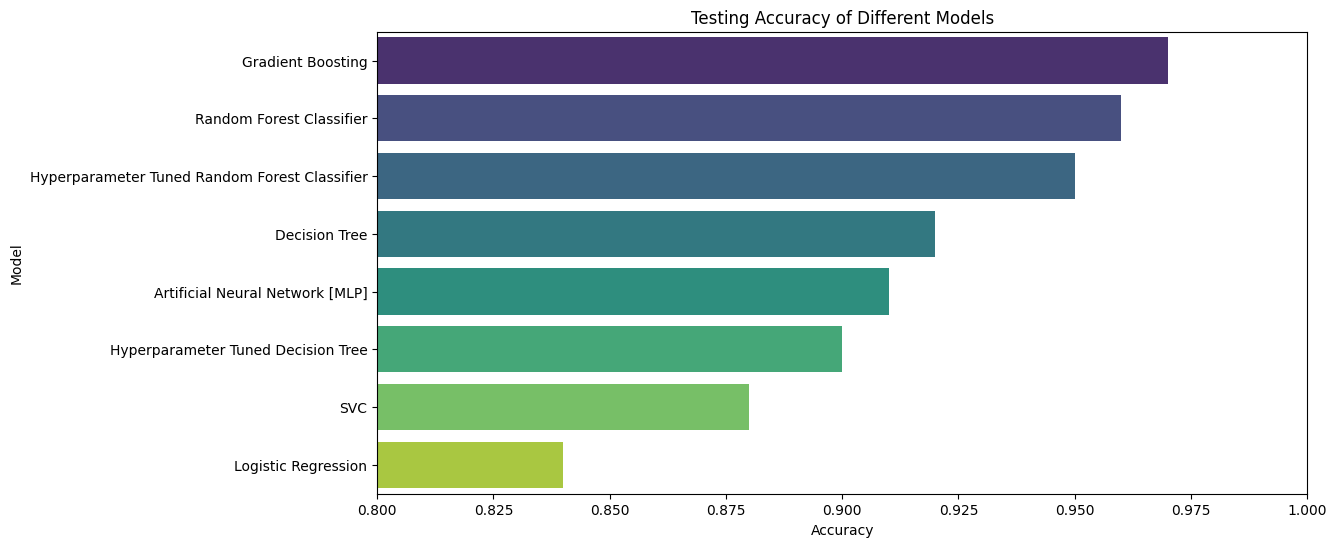

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a dictionary with the model names and their testing scores
dataf = {'Model': ['Logistic Regression', 'Decision Tree', 'Hyperparameter Tuned Decision Tree',
                   'Random Forest Classifier', 'Hyperparameter Tuned Random Forest Classifier',
                   'Gradient Boosting', 'SVC', 'Artificial Neural Network [MLP]'],
        'Testing Accuracy': [0.84, 0.92, 0.90, 0.96, 0.95, 0.97, 0.88, 0.91]} # Corrected Testing Accuracy values

# Create a DataFrame
df_scores = pd.DataFrame(dataf)

# Sort the DataFrame by Testing Accuracy
df_scores = df_scores.sort_values('Testing Accuracy', ascending=False)

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Testing Accuracy', y='Model', data=df_scores, palette='viridis')
plt.title('Testing Accuracy of Different Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
plt.xlim(0.8, 1.0) # Set x-axis limits for better visualization
plt.show()

## Conclusion:
Based on our analysis of various models, we've observed the following:

* **Logistic Regression:** This model served as a useful baseline, demonstrating consistent performance with training and testing scores of 0.85 and 0.84 respectively. The similar scores indicate that the model did not overfit the training data, but its overall predictive power is lower compared to more complex models.
* **Decision Tree:** The untuned Decision Tree achieved perfect performance on the training data (1.00) but showed a notable drop in performance on the testing data (0.92). This significant difference between training and testing scores is a strong indicator of overfitting, where the model has learned the training data too specifically and struggles to generalize to new, unseen examples.
* **Hyperparameter Tuned Decision Tree:** Tuning the hyperparameters of the Decision Tree improved its generalization capacity, resulting in a training score of 0.97 and a testing score of 0.90. While the gap between training and testing performance was reduced compared to the untuned version, it still shows some tendency towards overfitting.
* **Random Forest Classifier:** The Random Forest Classifier achieved perfect scores on the training data (1.00) and maintained a high performance on the testing data (0.96). This combination of high training and testing scores indicates that the model is capable of capturing the complexity of the data while generalizing effectively to new instances.
* **Hyperparameter Tuned Random Forest Classifier:**Tuning the Random Forest resulted in a training score of 0.98 and a testing score of 0.95. While both the tuned and untuned Random Forest models performed very well, the tuned version shows a slight reduction in the gap between training and testing scores, suggesting potentially improved robustness.
* **Gradient Boosting:** This model also demonstrated strong performance, achieving a perfect training score (1.00) and a high testing score of 0.97. This indicates excellent predictive power and good generalization ability.
* **SVC:** The Support Vector Classifier (SVC) showed balanced performance with training and testing scores of 0.90 and 0.88 respectively. While not exhibiting significant overfitting, its overall performance metrics were slightly lower than the ensemble models like Random Forest and Gradient Boosting.
* **Artificial Neural Network [MLP]:** The Multilayer Perceptron (MLP) also achieved a perfect training score (1.00) but exhibited a drop in performance on the testing data (0.91). Similar to the untuned Decision Tree, this suggests that the ANN may have overfit the training data to some extent.



## **Model Selection :**

In selecting the best model for predicting employee performance, we considered the performance of various algorithms.

*   We acknowledge the strong performance of the **Gradient Boosting** model, particularly its high testing score of 0.97. This demonstrates its excellent ability to predict on unseen data.

*   However, we explicitly address the concern about potential **overfitting** when a model achieves a perfect training score (1.00), as was the case with Gradient Boosting. While not always indicative of overfitting, it's a factor to consider regarding how well the model might perform on entirely new data distributions.

*   We choose the **Hyperparameter Tuned Random Forest Classifier's** strong testing performance (0.95 accuracy, 0.95 F1 score). More importantly, the smaller difference between its training performance (0.98 accuracy/F1) and testing performance is a strong indicator of **better generalization** to unseen data.

*   Therefore, we conclude that the **Hyperparameter Tuned Random Forest Classifier** is selected as the most suitable model due to its strong predictive accuracy combined with a better balance between training and testing performance, suggesting greater reliability on new data.
